In [23]:
A_F=[[7/8,1/8],[1/40,39/40]]
A_S=[[47/48,1/48],[1/192,191/192]]
from fractions import Fraction


A_COMPOSITE=[[] for i in range(len(A_F)+len(A_S))]
s=0
v=0
for i in range(len(A_S)):
    for j in range(len(A_F)):
        for k in range(len(A_F)):
            for m in range(len(A_S)):
                if s==4:
                    v=v+1
                    s=1
                    A_COMPOSITE[v].append(A_S[i][k]*A_F[j][m])
                else:
                    
                    A_COMPOSITE[v].append(A_S[i][k]*A_F[j][m])
                    s=s+1

In [62]:
A=[[0.5,0.5],[0.5,0.5]]

In [63]:


import numpy as np
# take a 3x3 matrix
#X = [0.3,0.3,0.2,0.2]
X=[0.3,0.7]


# result will be 3x4

result= [[0,0]]

result = np.dot(X,A)
print(sum(result))
for r in result:
	print(r)

1.0
0.5
0.5


In [60]:
import numpy as np
A=np.power(A,100)

In [102]:
B_2=[[0,10/48,20/48,10/48,8/48],[40/192,50/192,40/192,40/192,22/192]]
B_1=[[0,0.1875,0.0625,0.5,0.25],[0.4,0.2,0.2,0.1,0.1]]
B_C=[[] for i in range(len(B_1)*len(B_2))]

from fractions import Fraction



for j in range(len(B_C)):
    
    if j==0:
        m,n=0,0
    elif j==1:
        m,n=0,1
    elif j==2:
        m,n=1,0
    elif j==3:
        m,n=1,1

    
    for i in range(len(B_C)+1):
        
        a1=a2=z=0
        if i==0:
            a3=B_1[m][i]*B_2[n][i]
            B_C[j].append(a3)
            continue
            
        elif i==1:
        
            a1= a1+B_1[m][z]*B_2[n][i]
            a2= a2+B_1[m][i]*B_2[n][z]
            
            
        else:
            while (z<i):
                a1= a1+B_1[m][z]*B_2[n][i]
                a2= a2+B_1[m][i]*B_2[n][z]
                z= z+1
        
        
            
            
        
        a3=B_1[m][i]*B_2[n][i]
        
        B_C[j].append((a1+a2+a3))



In [103]:
A_COMPOSITE

[[0.8567708333333333,
  0.12239583333333333,
  0.018229166666666664,
  0.0026041666666666665],
 [0.024479166666666666,
  0.9546874999999999,
  0.0005208333333333333,
  0.020312499999999997],
 [0.004557291666666666,
  0.0006510416666666666,
  0.8704427083333333,
  0.12434895833333333],
 [0.00013020833333333333,
  0.005078124999999999,
  0.02486979166666667,
  0.9699218749999999]]

In [113]:
time=[]
for i in range(4):
    for j in range(4):
        if i==j:
            time.append(1/(1-A_COMPOSITE[i][j]))
        

In [114]:
time

[6.981818181818178, 22.068965517241335, 7.718592964824116, 33.24675324675317]

In [4]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array(A_COMPOSITE)
                           
model.emissionprob_=np.array(B_C)



#model.means_ = np.array([[0.0, 0.0], [
#3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(10000)

In [36]:
X.shape

(50000, 1)

In [37]:



import math
bi=[]
for i in range(1,8):

    zero=0  
    remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
    remodel.fit(X)
    for y in range(len(remodel.transmat_)):
        for z in range(len(remodel.transmat_)):
            if remodel.transmat_[y][z]==0:
                zero=zero+1
                
    
    
    
    N=(i*(i-1)-zero)
    bic = remodel.score(X) - (N/2)* math.log(len(X))
    bi.append(bic)
print(bi)
print(max(bi))
print(bi.index(max(bi))+1)

[-74828.00161396632, -73620.63018673731, -74853.91093291344, -73142.24885198251, -73145.2704545377, -73208.18398694185, -73267.72663933095]
-73142.24885198251
4


In [38]:
X=np.array(X).reshape(-1,)
X=list(X)
N=len(X)

L_0=10000
z=int(N/L_0)

m=[[] for w in range(int(z))]

for j in range(1,(int(z)+1)):
    z_new=N/(j*L_0)
    l=[[] for s in range(int(z_new))]
   
    for i in range(int(z_new)):
        for n in range(L_0):
            l[i].append(X[j*(n+(i)*L_0)])
    
    m[j-1].append(l)

In [39]:
bi_t=[]
for j in range(len(m)):
    b=[]
    for i in range(len(m[j][0])):
        
        seq=m[j][0][i]
        bb=[]
        for w in range(1,8):
            
            seq=np.array(seq).reshape(-1,1)
            zero=0  
            remodel = hmm.MultinomialHMM(n_components=w, n_iter=100)
            remodel.fit(seq)
            for y in range(len(remodel.transmat_)):
                for z in range(len(remodel.transmat_)):
                    if remodel.transmat_[y][z]==0:
                        zero=zero+1
        
            N=(w*(w-1)-zero)
            bic = remodel.score(seq) - (N/2)* math.log(len(seq))
            
            bb.append(bic)
        #print('bb',bb)
                
        
        #print('max',max(bb))
        #print('index',bb.index(max(bb))+1)
        #print()
        b.append(bb.index(max(bb))+1)
        #print(b)
    bi_t.append(b)
    







In [40]:
bi_t

[[3, 2, 3, 3, 4], [3, 3], [2], [2], [4]]

In [27]:
#####################1 lakh obs##########
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array(A_COMPOSITE)
                           
model.emissionprob_=np.array(B_C)



#model.means_ = np.array([[0.0, 0.0], [
#3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100000)

############

import math
bi=[]
for i in range(1,8):

    zero=0  
    remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
    remodel.fit(X)
    for y in range(len(remodel.transmat_)):
        for z in range(len(remodel.transmat_)):
            if remodel.transmat_[y][z]==0:
                zero=zero+1
                
    
    
    
    N=(i*(i-1)-zero)
    bic = remodel.score(X) - (N/2)* math.log(len(X))
    bi.append(bic)
print(bi)
print(max(bi))
print(bi.index(max(bi))+1)



###############################

X=np.array(X).reshape(-1,)
X=list(X)
N=len(X)

L_0=10000
z=int(N/L_0)

m=[[] for w in range(int(z))]

for j in range(1,(int(z)+1)):
    z_new=N/(j*L_0)
    l=[[] for s in range(int(z_new))]
   
    for i in range(int(z_new)):
        for n in range(L_0):
            l[i].append(X[j*(n+(i)*L_0)])
    
    m[j-1].append(l)


###############
bi_t=[]
transmatf=[]
for j in range(len(m)):
    b=[]
    transmat=[]
    for i in range(len(m[j][0])):
        
        seq=m[j][0][i]
        bb=[]
        trans=[]
        for w in range(1,8):
            
            seq=np.array(seq).reshape(-1,1)
            zero=0  
            remodel = hmm.MultinomialHMM(n_components=w, n_iter=100)
            remodel.fit(seq)
            for y in range(len(remodel.transmat_)):
                for z in range(len(remodel.transmat_)):
                    if remodel.transmat_[y][z]==0:
                        zero=zero+1
        
            N=(w*(w-1)-zero)
            bic = remodel.score(seq) - (N/2)* math.log(len(seq))
            
            bb.append(bic)
            trans.append(remodel.transmat_)
        #print('bb',bb)
                
        
        #print('max',max(bb))
        #print('index',bb.index(max(bb))+1)
        #print()
        b.append(bb.index(max(bb))+1)
        transmat.append(trans[bb.index(max(bb))])
        #print(b)
    bi_t.append(b)
    transmatf.append(transmat)
print(bi_t)

[-150126.12943350794, -148865.82808646778, -150160.07452642493, -148909.41687892601, -147029.02341476694, -147067.17304193293, -148562.49042026486]
-147029.02341476694
5
[[6, 3, 2, 2, 3, 3, 3, 4, 4, 4], [3, 2, 3, 3, 4], [3, 3, 1], [3, 3], [3, 3], [3], [2], [3], [2], [2]]


In [28]:
##################### ten thousand obs##########
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array(A_COMPOSITE)
                           
model.emissionprob_=np.array(B_C)



#model.means_ = np.array([[0.0, 0.0], [
#3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(10000)

############

import math
bi=[]
for i in range(1,8):

    zero=0  
    remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
    remodel.fit(X)
    for y in range(len(remodel.transmat_)):
        for z in range(len(remodel.transmat_)):
            if remodel.transmat_[y][z]==0:
                zero=zero+1
                
    
    
    
    N=(i*(i-1)-zero)
    bic = remodel.score(X) - (N/2)* math.log(len(X))
    bi.append(bic)
print(bi)
print(max(bi))
print(bi.index(max(bi))+1)



###############################

X=np.array(X).reshape(-1,)
X=list(X)
N=len(X)

L_0=1000
z=int(N/L_0)

m=[[] for w in range(int(z))]

for j in range(1,(int(z)+1)):
    z_new=N/(j*L_0)
    l=[[] for s in range(int(z_new))]
   
    for i in range(int(z_new)):
        for n in range(L_0):
            l[i].append(X[j*(n+(i)*L_0)])
    
    m[j-1].append(l)


###############
bi_t=[]
transmatf=[]
for j in range(len(m)):
    b=[]
    transmat=[]
    for i in range(len(m[j][0])):
        
        seq=m[j][0][i]
        bb=[]
        trans=[]
        for w in range(1,8):
            
            seq=np.array(seq).reshape(-1,1)
            zero=0  
            remodel = hmm.MultinomialHMM(n_components=w, n_iter=100)
            remodel.fit(seq)
            for y in range(len(remodel.transmat_)):
                for z in range(len(remodel.transmat_)):
                    if remodel.transmat_[y][z]==0:
                        zero=zero+1
        
            N=(w*(w-1)-zero)
            bic = remodel.score(seq) - (N/2)* math.log(len(seq))
            
            bb.append(bic)
            trans.append(remodel.transmat_)
        #print('bb',bb)
                
        
        #print('max',max(bb))
        #print('index',bb.index(max(bb))+1)
        #print()
        b.append(bb.index(max(bb))+1)
        transmat.append(trans[bb.index(max(bb))])
        #print(b)
    bi_t.append(b)
    transmatf.append(transmat)
print(bi_t)

[-15049.315710972982, -15058.035847217403, -14930.556717600688, -14908.260624509645, -14978.578705059454, -14898.90577166704, -14951.472138476802]
-14898.90577166704
6
[[1, 3, 1, 1, 1, 2, 1, 2, 3, 2], [3, 2, 1, 1, 1], [1, 1, 1], [3, 2], [1, 1], [1], [1], [1], [1], [1]]


In [29]:
#####################twenty thousand obs##########
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array(A_COMPOSITE)
                           
model.emissionprob_=np.array(B_C)



#model.means_ = np.array([[0.0, 0.0], [
#3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(30000)

############

import math
bi=[]
for i in range(1,8):

    zero=0  
    remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
    remodel.fit(X)
    for y in range(len(remodel.transmat_)):
        for z in range(len(remodel.transmat_)):
            if remodel.transmat_[y][z]==0:
                zero=zero+1
                
    
    
    
    N=(i*(i-1)-zero)
    bic = remodel.score(X) - (N/2)* math.log(len(X))
    bi.append(bic)
print(bi)
print(max(bi))
print(bi.index(max(bi))+1)



###############################

X=np.array(X).reshape(-1,)
X=list(X)
N=len(X)

L_0=3000
z=int(N/L_0)

m=[[] for w in range(int(z))]

for j in range(1,(int(z)+1)):
    z_new=N/(j*L_0)
    l=[[] for s in range(int(z_new))]
   
    for i in range(int(z_new)):
        for n in range(L_0):
            l[i].append(X[j*(n+(i)*L_0)])
    
    m[j-1].append(l)


###############
bi_t=[]
transmatf=[]
for j in range(len(m)):
    b=[]
    transmat=[]
    for i in range(len(m[j][0])):
        
        seq=m[j][0][i]
        bb=[]
        trans=[]
        for w in range(1,8):
            
            seq=np.array(seq).reshape(-1,1)
            zero=0  
            remodel = hmm.MultinomialHMM(n_components=w, n_iter=100)
            remodel.fit(seq)
            for y in range(len(remodel.transmat_)):
                for z in range(len(remodel.transmat_)):
                    if remodel.transmat_[y][z]==0:
                        zero=zero+1
        
            N=(w*(w-1)-zero)
            bic = remodel.score(seq) - (N/2)* math.log(len(seq))
            
            bb.append(bic)
            trans.append(remodel.transmat_)
        #print('bb',bb)
                
        
        #print('max',max(bb))
        #print('index',bb.index(max(bb))+1)
        #print()
        b.append(bb.index(max(bb))+1)
        transmat.append(trans[bb.index(max(bb))])
        #print(b)
    bi_t.append(b)
    transmatf.append(transmat)
print(bi_t)

[-45062.262197692005, -44782.088612965796, -44474.76301525932, -44390.908545257196, -44898.949986981395, -44262.3042711753, -44319.717717921194]
-44262.3042711753
6
[[3, 1, 2, 1, 1, 5, 2, 1, 3, 2], [3, 2, 1, 3, 4], [1, 1, 2], [3, 2], [1, 3], [2], [1], [2], [1], [1]]


In [30]:
#####################70000 obs##########
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array(A_COMPOSITE)
                           
model.emissionprob_=np.array(B_C)



#model.means_ = np.array([[0.0, 0.0], [
#3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(70000)

############

import math
bi=[]
for i in range(1,8):

    zero=0  
    remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
    remodel.fit(X)
    for y in range(len(remodel.transmat_)):
        for z in range(len(remodel.transmat_)):
            if remodel.transmat_[y][z]==0:
                zero=zero+1
                
    
    
    
    N=(i*(i-1)-zero)
    bic = remodel.score(X) - (N/2)* math.log(len(X))
    bi.append(bic)
print(bi)
print(max(bi))
print(bi.index(max(bi))+1)



###############################

X=np.array(X).reshape(-1,)
X=list(X)
N=len(X)

L_0=10000
z=int(N/L_0)

m=[[] for w in range(int(z))]

for j in range(1,(int(z)+1)):
    z_new=N/(j*L_0)
    l=[[] for s in range(int(z_new))]
   
    for i in range(int(z_new)):
        for n in range(L_0):
            l[i].append(X[j*(n+(i)*L_0)])
    
    m[j-1].append(l)


###############
bi_t=[]
transmatf=[]
for j in range(len(m)):
    b=[]
    transmat=[]
    for i in range(len(m[j][0])):
        
        seq=m[j][0][i]
        bb=[]
        trans=[]
        for w in range(1,8):
            
            seq=np.array(seq).reshape(-1,1)
            zero=0  
            remodel = hmm.MultinomialHMM(n_components=w, n_iter=100)
            remodel.fit(seq)
            for y in range(len(remodel.transmat_)):
                for z in range(len(remodel.transmat_)):
                    if remodel.transmat_[y][z]==0:
                        zero=zero+1
        
            N=(w*(w-1)-zero)
            bic = remodel.score(seq) - (N/2)* math.log(len(seq))
            
            bb.append(bic)
            trans.append(remodel.transmat_)
        #print('bb',bb)
                
        
        #print('max',max(bb))
        #print('index',bb.index(max(bb))+1)
        #print()
        b.append(bb.index(max(bb))+1)
        transmat.append(trans[bb.index(max(bb))])
        #print(b)
    bi_t.append(b)
    transmatf.append(transmat)
print(bi_t)

[-104965.9373807834, -104086.09367924713, -102580.93065648229, -102608.16680754238, -102656.61193849117, -102811.5333763657, -102787.14092494783]
-102580.93065648229
3
[[5, 3, 5, 2, 4, 2, 4], [2, 4, 2], [3, 2], [4], [2], [2], [3]]


In [109]:
##################### ten thousand obs##########
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array(A_COMPOSITE)
                           
model.emissionprob_=np.array(B_C)



#model.means_ = np.array([[0.0, 0.0], [
#3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(10000)

############

import math
bi=[]
for i in range(1,8):

    zero=0  
    remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
    remodel.fit(X)
    for y in range(len(remodel.transmat_)):
        for z in range(len(remodel.transmat_)):
            if remodel.transmat_[y][z]==0:
                zero=zero+1
                
    
    
    
    N=(i*(i-1)-zero)
    bic = remodel.score(X) - (N/2)* math.log(len(X))
    bi.append(bic)
print(bi)
print(max(bi))
print(bi.index(max(bi))+1)



###############################

X=np.array(X).reshape(-1,)
X=list(X)
N=len(X)

L_0=1000
z=int(N/L_0)

m=[[] for w in range(int(z))]

for j in range(1,(int(z)+1)):
    z_new=N/(j*L_0)
    l=[[] for s in range(int(z_new))]
   
    for i in range(int(z_new)):
        for n in range(L_0):
            l[i].append(X[j*(n+(i)*L_0)])
    
    m[j-1].append(l)


###############
bi_t=[]
transmatf=[]
for j in range(len(m)):
    b=[]
    transmat=[]
    for i in range(len(m[j][0])):
        
        seq=m[j][0][i]
        bb=[]
        trans=[]
        for w in range(1,8):
            
            seq=np.array(seq).reshape(-1,1)
            zero=0  
            remodel = hmm.MultinomialHMM(n_components=w, n_iter=100)
            remodel.fit(seq)
            for y in range(len(remodel.transmat_)):
                for z in range(len(remodel.transmat_)):
                    if remodel.transmat_[y][z]==0:
                        zero=zero+1
        
            N=(w*(w-1)-zero)
            bic = remodel.score(seq) - (N/2)* math.log(len(seq))
            
            bb.append(bic)
            trans.append(remodel.transmat_)
        #print('bb',bb)
                
        
        #print('max',max(bb))
        #print('index',bb.index(max(bb))+1)
        #print()
        b.append(bb.index(max(bb))+1)
        transmat.append(trans[bb.index(max(bb))])
        #print(b)
    bi_t.append(b)
    transmatf.append(transmat)
print(bi_t)

[-15049.315710972982, -15058.035847217403, -14930.556717600688, -14908.260624509645, -14978.578705059454, -14898.90577166704, -14951.472138476802]
-14898.90577166704
6
[[1, 3, 1, 1, 1, 2, 1, 2, 3, 2], [3, 2, 1, 1, 1], [1, 1, 1], [3, 2], [1, 1], [1], [1], [1], [1], [1]]


In [110]:
transmatf

[[array([[1.]]), array([[2.57812070e-01, 2.40008241e-03, 7.39787848e-01],
         [5.66069321e-03, 9.94339289e-01, 1.76256627e-08],
         [4.43836524e-01, 1.44166251e-02, 5.41746851e-01]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[0.6549544 , 0.3450456 ],
         [0.26741884, 0.73258116]]), array([[1.]]), array([[0.64971086, 0.35028914],
         [0.41423492, 0.58576508]]), array([[6.45235202e-01, 9.69613196e-03, 3.45068666e-01],
         [1.19403827e-02, 9.88059603e-01, 1.44167525e-08],
         [1.48074877e-01, 1.65124349e-06, 8.51923472e-01]]), array([[0.71864763, 0.28135237],
         [0.39515259, 0.60484741]])],
 [array([[6.73759884e-01, 1.46695984e-04, 3.26093420e-01],
         [1.74590151e-05, 9.93834691e-01, 6.14785009e-03],
         [5.76711787e-01, 4.25416114e-02, 3.80746602e-01]]),
  array([[0.89192805, 0.10807195],
         [0.18068398, 0.81931602]]),
  array([[1.]]),
  array([[1.]]),
  array([[1.]])],
 [array([[1.]]), array([[1.]]), array([[1.]])],
 [array

In [105]:
##################### fifty thousand obs##########
import numpy as np
from hmmlearn import hmm
import math
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array(A_COMPOSITE)
                           
model.emissionprob_=np.array(B_C)



#model.means_ = np.array([[0.0, 0.0], [
#3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(50000)
###############################

X=np.array(X).reshape(-1,)
X=list(X)
N=len(X)

L_0=5000
z=int(N/L_0)

m=[[] for w in range(int(z))]

for j in range(1,(int(z)+1)):
    z_new=N/(j*L_0)
    l=[[] for s in range(int(z_new))]
   
    for i in range(int(z_new)):
        for n in range(L_0):
            l[i].append(X[j*(n+(i)*L_0)])
    
    m[j-1].append(l)


###############
bi_t=[]
transmatf=[]
for j in range(len(m)):
    b=[]
    transmat=[]
    for i in range(len(m[j][0])):
        
        seq=m[j][0][i]
        bb=[]
        trans=[]
        for w in range(1,8):
            
            seq=np.array(seq).reshape(-1,1)
            zero=0  
            remodel = hmm.MultinomialHMM(n_components=w, n_iter=100)
            remodel.fit(seq)
            for y in range(len(remodel.transmat_)):
                for z in range(len(remodel.transmat_)):
                    if remodel.transmat_[y][z]==0:
                        zero=zero+1
        
            N=(w*(w-1)-zero)
            bic = remodel.score(seq) - (N/2)* math.log(len(seq))
            
            bb.append(bic)
            trans.append(remodel.transmat_)
        #print('bb',bb)
                
        
        #print('max',max(bb))
        #print('index',bb.index(max(bb))+1)
        #print()
        b.append(bb.index(max(bb))+1)
        transmat.append(trans[bb.index(max(bb))])
        #print(b)
    bi_t.append(b)
    transmatf.append(transmat)
print(bi_t)

[[2, 3, 1, 3, 4, 4, 2, 3, 2, 2], [1, 3, 5, 3, 2], [2, 3, 4], [3, 2], [3, 2], [2], [1], [1], [3], [2]]


In [106]:
np.array(l).shape

(1, 5000)

In [107]:
np.array(transmatf).shape

(10,)

In [108]:
transmatf[0]

[array([[0.9917694 , 0.0082306 ],
        [0.02787713, 0.97212287]]),
 array([[0.55626787, 0.43761969, 0.00611244],
        [0.57838555, 0.41876906, 0.00284539],
        [0.01511509, 0.01300134, 0.97188357]]),
 array([[1.]]),
 array([[0.99252318, 0.00364541, 0.00383141],
        [0.02389941, 0.41631211, 0.55978848],
        [0.01463508, 0.48722779, 0.49813713]]),
 array([[0.40858526, 0.48627378, 0.00595026, 0.0991907 ],
        [0.43546709, 0.4530922 , 0.00438508, 0.10705563],
        [0.01138149, 0.00605258, 0.94064225, 0.04192369],
        [0.15793206, 0.53007036, 0.10481211, 0.20718547]]),
 array([[2.53253788e-01, 3.98585860e-01, 3.37372090e-01, 1.07882620e-02],
        [3.55440703e-01, 2.79153498e-01, 3.59619382e-01, 5.78641704e-03],
        [2.21462421e-01, 3.11056146e-01, 4.65038975e-01, 2.44245779e-03],
        [3.49569975e-03, 1.57761719e-02, 8.19143428e-04, 9.79908985e-01]]),
 array([[0.99332153, 0.00667847],
        [0.0218337 , 0.9781663 ]]),
 array([[0.97965603, 0.01251215,

In [131]:
A=[[0.25 for i in range(4)] for j in range(4)]

In [132]:
A

[[0.25, 0.25, 0.25, 0.25],
 [0.25, 0.25, 0.25, 0.25],
 [0.25, 0.25, 0.25, 0.25],
 [0.25, 0.25, 0.25, 0.25]]

In [138]:
time=[]
for i in range(4):
    for j in range(4):
        if i==j:
            #print(A[i][j])
            time.append(1/(1-A[i][j]))


In [139]:
1/

[1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333]

In [55]:
B=[[0.2 for i in range(5)] for j in range(4)]

In [56]:
B

[[0.2, 0.2, 0.2, 0.2, 0.2],
 [0.2, 0.2, 0.2, 0.2, 0.2],
 [0.2, 0.2, 0.2, 0.2, 0.2],
 [0.2, 0.2, 0.2, 0.2, 0.2]]

In [129]:
##################### fifty thousand obs##########
import numpy as np
from hmmlearn import hmm
import math
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array(A)
                           
model.emissionprob_=np.array(B_C)



#model.means_ = np.array([[0.0, 0.0], [
#3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(10000)
###############################
import math
bi=[]
for i in range(1,8):

    zero=0  
    remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
    remodel.fit(X)
    for y in range(len(remodel.transmat_)):
        for z in range(len(remodel.transmat_)):
            if remodel.transmat_[y][z]==0:
                zero=zero+1
                
    
    
    
    N=(i*(i-1)-zero)
    bic = remodel.score(X) - (N/2)* math.log(len(X))
    bi.append(bic)
print(bi)
print(max(bi))
print(bi.index(max(bi))+1)
########################

X=np.array(X).reshape(-1,)
X=list(X)
N=len(X)

L_0=1000
z=int(N/L_0)

m=[[] for w in range(int(z))]

for j in range(1,(int(z)+1)):
    z_new=N/(j*L_0)
    l=[[] for s in range(int(z_new))]
   
    for i in range(int(z_new)):
        for n in range(L_0):
            l[i].append(X[j*(n+(i)*L_0)])
    
    m[j-1].append(l)


###############
bi_t=[]
transmatf=[]
for j in range(len(m)):
    b=[]
    transmat=[]
    for i in range(len(m[j][0])):
        
        seq=m[j][0][i]
        bb=[]
        trans=[]
        for w in range(1,8):
            
            seq=np.array(seq).reshape(-1,1)
            zero=0  
            remodel = hmm.MultinomialHMM(n_components=w, n_iter=100)
            remodel.fit(seq)
            for y in range(len(remodel.transmat_)):
                for z in range(len(remodel.transmat_)):
                    if remodel.transmat_[y][z]==0:
                        zero=zero+1
        
            N=(w*(w-1)-zero)
            bic = remodel.score(seq) - (N/2)* math.log(len(seq))
            
            bb.append(bic)
            trans.append(remodel.transmat_)
        #print('bb',bb)
                
        
        #print('max',max(bb))
        #print('index',bb.index(max(bb))+1)
        #print()
        b.append(bb.index(max(bb))+1)
        transmat.append(trans[bb.index(max(bb))])
        #print(b)
    bi_t.append(b)
    transmatf.append(transmat)
print(bi_t)

[-13800.468764080293, -13809.318168486534, -13826.25850755264, -13851.068325583132, -13892.260231314693, -13936.300775162952, -13990.592245620308]
-13800.468764080293
1
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1], [1, 1], [1, 1], [1], [1], [1], [1], [1]]


In [130]:
transmatf

[[array([[1.]]),
  array([[1.]]),
  array([[1.]]),
  array([[1.]]),
  array([[1.]]),
  array([[1.]]),
  array([[1.]]),
  array([[1.]]),
  array([[1.]]),
  array([[1.]])],
 [array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]])],
 [array([[1.]]), array([[1.]]), array([[1.]])],
 [array([[1.]]), array([[1.]])],
 [array([[1.]]), array([[1.]])],
 [array([[1.]])],
 [array([[1.]])],
 [array([[1.]])],
 [array([[1.]])],
 [array([[1.]])]]

In [ ]:
###############################################################################################################

In [ ]:

import numpy as np
from hmmlearn import hmm

k_min=1
k_max=8


pi=[[] for ]




np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array(pi)
model.transmat_ = np.array(A_COMPOSITE)
                           
model.emissionprob_=np.array(B_C)



#model.means_ = np.array([[0.0, 0.0], [
#3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(10000)

import math
bi=[]


    zero=0  
    remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
    remodel.fit(X)
    for y in range(len(remodel.transmat_)):
        for z in range(len(remodel.transmat_)):
            if remodel.transmat_[y][z]==0:
                zero=zero+1
                
    
    
    
    N=(i*(i-1)-zero)
    bic = remodel.score(X) - (N/2)* math.log(len(X))
    bi.append(bic)
print(bi)
print(max(bi))
print(bi.index(max(bi))+1)

























In [ ]:
##########################3

In [194]:
X=np.array(X).reshape(-1,)
X=list(X)
N=len(X)

L_0=1000
z=int(N/L_0)

m=[[] for w in range(int(z))]
bi_t=[]

for j in range(1,(int(z)+1)):
    z_new=N/(j*L_0)
    l=[[] for s in range(int(z_new))]
    b=[]
    for i in range(int(z_new)):
        for n in range(L_0):
            l[i].append(X[j*(n+(i)*L_0)])
    
    
        bb=[]
        for w in range(1,8):
            
            l[i]=np.array(l[i]).reshape(-1,1)
            zero=0  
            remodel = hmm.MultinomialHMM(n_components=w, n_iter=100)
            remodel.fit(l[i])
            for y in range(len(remodel.transmat_)):
                for z in range(len(remodel.transmat_)):
                    if remodel.transmat_[y][z]==0:
                        zero=zero+1
        
            N=(w*(w-1)-zero)
            bic = remodel.score(l[i]) - (N/2)* math.log(len(l[i]))
            
            bb.append(bic)
        #print('bb',bb)
                
        
        #print('max',max(bb))
        #print('index',bb.index(max(bb))+1)
        #print()
        b.append(bb.index(max(bb))+1)
        #print(b)
    bi_t.append(b)
    m[j-1].append(l)

In [115]:
N=len(X)

L_0=5
z=int(N/L_0)

m=[[] for w in range(int(z))]
b_c=[[] for w in range(int(z))]
for j in range(1,(int(z)+1)):
    z_new=N/(j*L_0)
    l=[[] for s in range(int(z_new))]
    b=[[] for s in range(int(z_new))]
    for i in range(int(z_new)):
        for n in range(L_0):
            l[i].append(X[j*(n+(i)*L_0)])
        
        for w in range(1,8):
            bb=[]
            l[i]=np.array(l[i]).reshape(-1,1)
            zero=0  
            remodel = hmm.MultinomialHMM(n_components=w, n_iter=100)
            remodel.fit(l[i])
            for y in range(len(remodel.transmat_)):
                for z in range(len(remodel.transmat_)):
                    if remodel.transmat_[y][z]==0:
                        zero=zero+1
                
    
    
    
            N=(w*(w-1)-zero)
            bic = remodel.score(l[i]) - (N/2)* math.log(len(l[i]))
            
            bb.append(bic)

        b[i].append(bb.index(max(bb))+1)
        #print(b)
    
        
    m[j-1].append(l)
    b_c[j-1].append(b)
    print(b_c)


Fitting a model with 11 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 20 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 31 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 44 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 59 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 76 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 11 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 20 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 31 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model wit

[[[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]], [], [], [], [], [], [], [], [], []]
[[[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]], [[[1], [1], [1]]], [], [], [], [], [], [], [], []]


Fitting a model with 59 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 76 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 11 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 20 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 31 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 44 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 59 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 76 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model with 11 free scalar parameters with only 5 data points will result in a degenerate solution.
Fitting a model wit

[[[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]], [[[1], [1], [1]]], [[[1], [1]]], [], [], [], [], [], [], []]
[[[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]], [[[1], [1], [1]]], [[[1], [1]]], [[[1]]], [], [], [], [], [], []]
[[[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]], [[[1], [1], [1]]], [[[1], [1]]], [[[1]]], [[[1]]], [], [], [], [], []]
[[[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]], [[[1], [1], [1]]], [[[1], [1]]], [[[1]]], [[[1]]], [[]], [], [], [], []]
[[[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]], [[[1], [1], [1]]], [[[1], [1]]], [[[1]]], [[[1]]], [[]], [[]], [], [], []]
[[[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]], [[[1], [1], [1]]], [[[1], [1]]], [[[1]]], [[[1]]], [[]], [[]], [[]], [], []]
[[[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]], [[[1], [1], [1]]], [[[1], [1]]], [[[1]]], [[[1]]], [[]], [[]], [[]], [[]], []]
[[[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]], [[[1], [1], [1]]], [[[1], [1]]], [[[1]]], [[[1]]], [[]], [

In [106]:
np.array(b_c).shape

(10, 1)

In [108]:
np.array(m).shape

(10, 1)

In [109]:
np.array(b_c).shape

(10, 1)

In [110]:
b_c

[[[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]],
 [[]],
 [[]],
 [[]],
 [[]],
 [[]],
 [[]],
 [[]],
 [[]],
 [[]]]

In [81]:
import math
bi=[]
for i in range(1,9):

    zero=0  
    remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
    remodel.fit(x)
    for y in range(len(remodel.transmat_)):
        for z in range(len(remodel.transmat_)):
            if remodel.transmat_[y][z]==0:
                zero=zero+1
                
    
    
    
    N=(i*(i-1)-zero)
    bic = remodel.score(x) - (N/2)* math.log(len(x))
    bi.append(bic)
print(bi)
print(max(bi))
print(bi.index(max(bi))+1)

[-1482.070811141678, -1488.46981984397, -1469.2053330490444, -1496.712727528573, -1518.2474877291595, -1550.6873310181477, -1589.4710071502436, -1634.023787846811]
-1469.2053330490444
3


In [56]:
np.array(m).shape

(10, 1)

In [57]:
np.array(m[0]).shape

(1, 10, 1000)

In [58]:
np.array(m[1]).shape

(1, 5, 1000)

In [42]:

T=[]
for i in range(len(remodel.transmat_)):
    for j in range(len(remodel.transmat_)):
        if i==j:
            print(i,j)
            T_F=(1/(1-(remodel.transmat_[i][i])))
            T.append(T_F)
            
print(T)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
[1.5188872913597338, 1.3073950756938508, 1.20738027613094, 1.347291329300653, 1.1849435159524748, 1.3478618438206897, 1.3633273337139387, 1.1299646121650924, 1.149745825454688]


In [4]:
maxi=[]

for i in range(len(A_COMPOSITE)):
    for j in range(len(A_COMPOSITE)):
        maxi.append(A_COMPOSITE[i][j])
        
T_s=(1/(1-max(maxi)))
print(maxi)
T_s

[0.8567708333333333, 0.12239583333333333, 0.018229166666666664, 0.0026041666666666665, 0.024479166666666666, 0.9546874999999999, 0.0005208333333333333, 0.020312499999999997, 0.004557291666666666, 0.0006510416666666666, 0.8704427083333333, 0.12434895833333333, 0.00013020833333333333, 0.005078124999999999, 0.02486979166666667, 0.9699218749999999]


33.24675324675317

In [5]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array(A_COMPOSITE)
                           
model.emissionprob_=np.array(B_C)



#model.means_ = np.array([[0.0, 0.0], [
#3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(500)

In [6]:
- 2 * model.log_likelihood(X) + len(model.X) * np.log(model._size_transformed(X))

AttributeError: 'MultinomialHMM' object has no attribute 'log_likelihood'

In [7]:
X.shape

(500, 1)

[-178.88679445219586, -178.58907403711618, -180.99145992913589, -185.01977346990338, -184.91867879539723, -193.66025751316673, -196.43093764717045, -202.74825145591424, -205.65542369952598, -212.76933806132638, -220.44729247696566, -222.21865417442348, -247.8871732199458, -262.20266767761325]
1


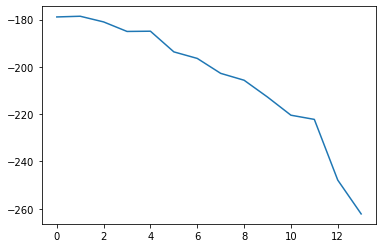

In [180]:
from sklearn.model_selection import ShuffleSplit
from statistics import mean
X=list(np.array(X).reshape(-1,))
clu=[]
for i in range(1,15):
    s=[]
    ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
    for train_index, test_index in ss.split(X):
        
        train_index_n=[]

        for m in train_index:
            train_index_n.append(X[m])
        
        test_index_n=[]

        for n in test_index:
            test_index_n.append(X[n])
    
        train_index_n=np.array(train_index_n).reshape(-1,1)
        test_index_n=np.array(test_index_n).reshape(-1,1)
    
        remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
        remodel.fit(train_index_n)
        s.append(remodel.score(test_index_n))
    clu.append(mean(s))
    
print(clu)   
print(clu.index(max(clu)))

from matplotlib import  pyplot as plt
plt.plot(clu)
    

In [167]:
clu

[0.0,
 5.551115123125783e-17,
 1.1102230246251565e-16,
 8.881784197001253e-17,
 0.0,
 -4.4408920985006264e-17,
 1.554312234475219e-16,
 8.881784197001253e-17,
 -8.881784197001253e-17]

In [108]:
clu.index(max(clu))

2

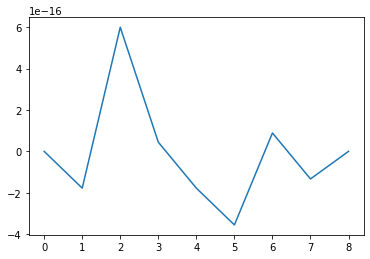

In [109]:
from matplotlib import  pyplot as plt
plt.plot(clu)
    
    

    

In [28]:
X_n=[]
X_n.append(X[6])
X_n

[array([3], dtype=int64)]

In [38]:
list(np.array(X).reshape(-1,))

[4, 3, 2, 4, 4, 4, 3, 3, 3, 3]

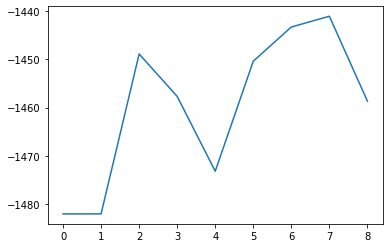

In [44]:
from matplotlib import pyplot as plt
plt.plot(s)

In [138]:
train_index=train_index.reshape(-1,1)

In [139]:
test_index=test_index.reshape(-1,1)

In [144]:
train_index.shape

(200, 1)

In [4]:
X = X.tolist()
X=sum(X, [])
import random
Y=[]

for i in range(len(X)):
    if X[i]==0:
        Y.append(2)
    elif X[i]==1:
        Y.append(2.5)
    elif X[i]==2:
        Y.append(3)
    elif X[i]==3:
        Y.append(3.5)
    elif X[i]==4:
        Y.append(4)
    
print(Y)

[4, 3.5, 3, 4, 4, 4, 3.5, 3.5, 3.5, 3.5, 3, 3.5, 4, 3.5, 3, 3.5, 4, 4, 3, 3.5, 3.5, 4, 3.5, 3.5, 3.5, 4, 4, 4, 3.5, 3.5, 3.5, 3.5, 3.5, 4, 4, 3.5, 4, 4, 3, 3, 3.5, 2.5, 3.5, 3.5, 3.5, 4, 3.5, 3.5, 3.5, 3, 3.5, 3.5, 3.5, 4, 2.5, 3, 4, 4, 3.5, 3.5, 4, 3, 3.5, 4, 3.5, 3.5, 3.5, 3.5, 4, 4, 3.5, 3.5, 2.5, 3.5, 3.5, 3.5, 3.5, 2.5, 3.5, 3.5, 3.5, 3, 4, 2.5, 3.5, 2, 2.5, 2.5, 3, 2.5, 2.5, 4, 3.5, 3.5, 2.5, 4, 3.5, 3, 4, 3.5, 2.5, 4, 2, 3.5, 3, 4, 3.5, 3.5, 4, 4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4, 2.5, 3.5, 4, 3.5, 4, 4, 4, 3.5, 3.5, 3.5, 4, 3, 4, 3.5, 4, 4, 3.5, 4, 4, 3.5, 3.5, 4, 3.5, 3, 2.5, 3.5, 3.5, 2.5, 3.5, 3.5, 3.5, 2.5, 3.5, 3.5, 4, 3.5, 3.5, 2.5, 4, 4, 3.5, 3.5, 4, 3.5, 4, 3.5, 3.5, 4, 3, 3, 4, 3, 3.5, 3.5, 3.5, 3, 4, 4, 3.5, 4, 3.5, 3.5, 3.5, 3.5, 3.5, 4, 2.5, 2.5, 4, 3.5, 2.5, 3.5, 4, 4, 4, 3.5, 4, 3, 3.5, 4, 3, 3.5, 4, 4, 4, 2, 2.5, 4, 3.5, 3, 3, 3.5, 3.5, 3, 3.5, 4, 2.5, 3.5, 2.5, 3.5, 4, 2, 4, 3, 4, 3.5, 2.5, 3.5, 4, 3, 3, 2.5, 3.5, 3.5, 3, 4, 4, 4, 4, 4, 3.5, 3, 3.5, 3.5, 4, 

In [ ]:
######

import RPi.GPIO as GPIO
import time
from time import sleep

in1 = 24
in2 = 23
en = 25
temp1=1

GPIO.setmode(GPIO.BCM)
GPIO.setup(in1,GPIO.OUT)
GPIO.setup(in2,GPIO.OUT)
GPIO.setup(en,GPIO.OUT)
GPIO.output(in1,GPIO.LOW)
GPIO.output(in2,GPIO.LOW)
p=GPIO.PWM(en,1000)

p.start(25)
print("\n")
print("The default speed & direction of motor is LOW & Forward.....")
print("r-run s-stop f-forward b-backward l-low m-medium h-high e-exit")
print("\n")    
#X=[4.101865107197259, 3.2433525143631594, 2.403048775622303, 3.5579999337464123, 3.091117929499144, 4.104005581924212, 2.0182308789566696, 2.4532558923458807, 3.2036136925276617, 2.4999623674057196, 2.416099791045351, 2.614857664578057, 3.13379087478139, 3.134407248840527, 2.1723545308791654, 2.018940493361078, 4.3580816457847895, 3.864137526144009, 2.28450046112294, 2.6462585236410003, 2.6592946061842886, 4.158318764821891, 3.0768013184188683, 3.2504588271527393, 2.4270090171516747, 3.3159853293536394, 3.7033942999892755, 4.143973421699519, 2.1338408734725407, 2.99484650452055, 2.706603702715767, 2.9944245375871246, 3.0616831790218955, 3.690132456420576, 4.493931843013874, 2.247062572484868, 3.8623598796635497, 3.3018428925212895, 2.0032074168627356, 2.115629718317625, 3.236313722309507, 2.3876197250810427, 2.635017298261883, 3.1461865405276326, 2.6062344294423694, 3.1129847118457796, 3.3849249564936237, 2.530064449720696, 2.9664694697787475, 2.0802579241272108, 3.0501363246852997, 3.3967003442651027, 2.020971973548071, 3.2704659196415307, 2.3407148803970497, 2.4165944723419366, 3.560637927929068, 3.8006700520503163, 2.020750257974061, 3.470378036566898, 3.740186594111181, 2.2273951501956786, 2.835184435110213, 3.8197403337652562, 3.100919949731437, 2.0012341921373107, 2.583794038339966, 2.9995016861046166, 3.1693122040250192, 4.218642801347679, 2.0660632923667928, 2.610658727625194, 2.105256005956245, 3.3405669010390615, 2.5379712286786473, 2.0953326367566967, 2.5112521735060818, 2.1258289044260086, 3.470392069906642, 3.4463549874399604, 3.355633615093987, 3.3839293911083006, 3.678364150816544, 2.207472509618234, 3.0609050003923572, 2.0380787654123207, 2.9005030638581784, 2.050658093767556, 2.5701437429758487, 2.400401386110583, 2.1355181348339465, 3.9121878693133794, 3.036123532177082, 3.107324453125889, 2.729739783145096, 3.916017887456765, 3.437534760703029, 2.9069124476947636, 3.8282487181141964, 3.462633845810039, 2.2169421203336346, 3.969299109345485, 2.278775759251046, 3.4141017765219326, 2.0688107268348173, 3.38621084841568, 2.333578509837355, 2.2827731952120955, 3.3799619832765098, 3.6721216865549264, 3.493298526653877, 2.571517690419127, 2.668234984095458, 2.75845097880763, 3.234544696931633, 3.38783749400997, 2.987669087281976, 3.4529988847614885, 2.0212874031527823, 2.137201152447697, 4.378767630206193, 2.785568671708056, 4.463198664427301, 4.079748751394091, 3.8931438660629225, 2.6755733680611904, 2.7916567562249828, 3.3007808205805222, 3.0844657365812944, 2.0886230470364753, 4.354442461204362, 3.454790196619113, 3.044827258674334, 3.3767354456982734, 2.5393205473677, 3.69700418192658, 4.464161411162848, 3.0209541078695925, 3.41772049875374, 3.199625175909437, 2.8075186249594917, 2.0248775008201365, 2.468227804709029, 3.2902397623627833, 3.0761330503502746, 2.471207954642984, 2.706011827787769, 3.363495114210336, 2.23125234930618, 2.0871055817689284, 3.074880274139393, 3.087762134115705, 4.324237001343072, 2.7689495375145943, 2.36352310466484, 2.2303281327042606, 4.11263401577471, 3.172576129352077, 2.038063059385279, 2.6226313137039163, 3.336659179317436, 2.235544874880796, 3.4506873083106075, 3.4776759574016083, 2.3758383616411436, 3.4541226832991625, 2.4603233730467235, 2.1869014119081145, 3.3765398106140845, 2.4008915617318634, 2.875377539108201, 2.884355893943588, 3.2907814837572795, 2.020094332094456, 3.025365709411772, 3.736929261519815, 2.092656978265526, 3.268812753155657, 3.407649322577665, 3.336133414682539, 3.442910468867084, 3.490119574196737, 2.787269737651027, 4.06685745644778, 2.1901377769087844, 2.479993937046994, 3.462350769734412, 2.6838202706542758, 2.2392092977668003, 2.2633764849548115, 3.1052170078678136, 3.763914388944251, 3.6196855031201443, 2.307961026885961, 3.8038684728805263, 2.6913092925010518, 3.0833302068522923, 4.243336900869339, 2.673564980888684, 3.4065600487934478, 4.499627393606623, 3.7850183520235716, 3.8825477165810014, 2.0505427922215373, 2.1129116819975957, 4.305562322321228, 3.1560483718456305, 2.5937396325495676, 2.5779688728783907, 3.199686852094467, 3.132617949481543, 2.725703672867815, 3.0980007185738003, 3.9170949092349123, 2.2093317933540613, 3.158742420694803, 2.045391220080952, 3.253813566553561, 3.5155018146440344, 2.1098990620350953, 4.009937180691299, 2.6722772933778525, 4.058484731201382, 3.3165458271625092, 2.323053178248703, 3.4594094252794805, 4.440164002921681, 2.7829220359009574, 2.8138962158613428, 2.0814698140992993, 3.2184902837302967, 3.0856788593529094, 2.910144576585869, 3.505586905821845, 4.477315989062397, 4.419516213502187, 3.7604518658827977, 4.290622151670329, 3.220035795848876, 3.4794911074675854, 3.3433702256488758, 3.3674473658168957, 4.462732819508446, 2.5935383896302966, 3.9295678006685444, 3.2592428887006686, 2.4914046612067198, 2.670417290613399, 2.384952436345632, 4.25697078296298, 3.478264658700969, 3.7129757930803606, 2.366449495477213, 3.5783353831386893, 3.0092420183889805, 2.8303356904493033, 3.7840925019315117, 2.381859879397658, 3.8646295263096158, 2.3146821420007186, 2.6452821643287474, 3.8322245527582073, 2.888046581768608, 2.880468204490343, 3.8873607090591022, 4.369647325744199, 3.0535088002043835, 4.280491767991864, 2.0311822722400166, 2.2829253399841165, 3.1471706481400505, 3.0135449296150174, 2.7369924965491723, 3.0913625425518614, 3.2698322912645286, 3.6181032525910775, 3.2848180723966904, 2.8373020826818296, 2.285190192653958, 3.1496780943308202, 2.2743996848897483, 2.1062083234089584, 3.332078795960542, 2.5251085800057944, 2.5443044683572746, 3.225736897665028, 3.1816165644114567, 4.251487867660556, 4.02726016921239, 2.1974623443556673, 4.448240390485305, 2.8495448688953884, 2.084228431053812, 2.477348558390233, 2.234222422981324, 3.4840034245792024, 2.674042922575715, 2.6403799148143925, 2.012561477793159, 2.3043705627705835, 2.9585617756585485, 2.1180787756469455, 2.519655366500383, 2.709646413175812, 3.1358714839418687, 3.0081159450099384, 2.4371931501749318, 4.209107347627701, 2.706139192012926, 3.2274766450562726, 2.966950449162764, 2.9418435819757587, 2.893744421837193, 3.129048325965384, 2.9983506365104695, 3.9323038595391995, 3.12799562496894, 2.751926535841083, 2.1006682773469407, 2.921998234192305, 2.786116623740335, 2.7920474854286876, 3.5171545602993652, 3.3101874018949995, 2.840055333375323, 3.1638205516948466, 3.398606487698922, 2.0299561254490324, 2.6323898218749253, 3.3454819888021907, 4.041372441836001, 2.382325506403584, 2.1072515372700895, 2.1050681493883725, 2.93798611003552, 3.8293320725339695, 3.002815475851541, 4.381366564072016, 2.853664886440864, 3.540884231282627, 2.011416682181603, 3.1434858326946737, 3.4436256826501537, 2.8550520036996505, 2.411438771254571, 2.8914350395190387, 2.456262872331404, 3.3754019305019285, 3.1842861774536275, 2.6361812472145907, 2.0640603687855448, 2.4154623232407344, 4.032186331443085, 3.5622845194896007, 3.4627709362689227, 3.330282090156766, 2.839265967197588, 4.2225920838870055, 4.097830852878254, 3.059521305925371, 2.4213931595068905, 3.342333263258559, 3.6069055536153467, 3.143980660053117, 2.3256942679789017, 3.5551109192546035, 3.178320251476851, 3.674222204648195, 3.7317359212997543, 2.5585916192998135, 2.6589445658259976, 3.040943445204138, 3.714325569510577, 3.0957292055327765, 3.486213647661969, 4.185892073926739, 2.9441366465509082, 3.418916108055324, 3.40645261692891, 3.335395333738506, 2.5699771696125873, 3.098140360081892, 3.364913850006045, 3.8307058560742373, 3.97846305850423, 3.603663869214985, 2.805157617439747, 2.1575088656891515, 3.2628610215505844, 3.029044142647763, 3.226265459354811, 2.9937070917678463, 4.4659729905955095, 2.6314868473191386, 4.182989275115179, 3.1181075309233948, 3.2498602163400525, 3.6509513854470006, 3.1928321774642283, 4.365357383356055, 2.244351787380347, 3.024768967603288, 3.13691387435855, 4.4433435437420306, 2.1228140914351585, 3.7847630637539753, 4.008247925550845, 3.214172482450555, 2.5921793139534004, 2.8036157567991755, 2.365808976381846, 2.9993073594836663, 4.443871533462825, 2.902069830096866, 2.7074082501147068, 2.805707231411692, 2.380945815608391, 2.99367331023978, 2.8323064617774567, 3.105298687387851, 3.184224140842765, 4.305828923472682, 2.5198762461094497, 4.175995339720908, 3.488555114019191, 3.223101233119449, 3.944628538694061, 2.1999659959634252, 2.8256438258222185, 2.2238748311348386, 2.903545360200349, 2.6256851684006457, 3.294282797212479, 2.3643149058796857, 4.4438202056168965, 2.9133968281485645, 2.726490580737418, 2.4277857423093643, 3.3255578042532585, 2.524614220417782, 3.136828342848044, 2.49929803646552, 2.3511666362748507, 2.298097347271101, 2.796803510348984, 3.7771422456994523, 2.695028016647297, 2.1038987538731964, 3.582027095292608, 2.1812806288853497, 2.091351536953413, 3.380516957252754, 3.703146056490883, 2.855179478465345, 2.9388155770897946, 2.1538368514057114, 2.6249228920349443, 2.5849694968983705, 4.277288329951553, 2.3816905250556513, 2.5369666562397275, 3.408017150031658, 2.1293403199372642, 3.074148488684543, 2.4242293457063813, 3.9869075335653728, 3.1332189381809057, 2.8849070016789944, 4.3443756008738905, 3.2918023974954678, 3.088309658906497, 3.88176266603826, 2.4662193359100657, 4.133788086531108, 3.047200074629108, 3.305286105763037, 4.323429716953985, 2.8575504419205098, 2.2552004702281967, 3.292048920452466, 3.409653129356003, 2.5647765770182946, 2.6178434356287212, 2.152163406923969, 2.7955311061870596, 4.352233335135763, 2.0432012058580975, 2.553992424052138, 2.353070189878146, 3.4945350231822148, 3.1000739228509695, 2.2671571794089838, 2.9525973220186272, 2.855828632165615, 3.8713529518645013, 3.173668036139215, 3.329195238881117, 2.329859947642226, 2.166747806523857, 2.756907693398071, 3.4720701748694762, 3.319673385534297, 3.2791563196852174, 3.529933906458228, 2.923145821220807, 4.361247776037914, 2.224592789749723, 4.104392893382208, 3.148499287654843, 2.3332220090261186, 2.286982781848546, 4.282901916153456, 2.901645340410775, 3.785405056122634, 3.961907004982431, 3.1519444326776167, 2.100419699594961, 3.45238592288017, 3.396692316527175, 2.8345880681674345, 3.02069395741153, 3.162037690589656, 3.2543725099440146, 2.3721266520826703, 2.474667404001371, 3.2096124752326594, 3.442298972218688, 2.903288939826555, 2.8470288734537026, 3.296783707686867, 4.000653414305194, 2.9727756238995973, 3.021946315754169, 2.0307088191147775, 2.875623822843742, 2.887185557183712, 2.187733695774849, 2.9543820432129517, 3.1790246332836447, 4.3082647970172445, 2.350467324379427, 3.969440568103939, 2.881528153917715, 2.3419879307874356, 2.422252335611706, 3.1960576171151756, 3.3161420250316063, 2.2015706022312425, 2.406906575460615, 2.749903859782245, 4.416900802486832, 4.400803710429782, 2.2997484740248066, 3.273000212332037, 2.0023341583255516, 2.0927860409780337, 3.4377853727320056, 3.327370540884209, 3.6247029174383036, 2.2378675880041747, 4.426442920245509, 3.725834589591752, 3.3564641772200847, 2.973570031674865, 2.960200373111229, 2.7497731976250135, 2.811345934983085, 2.165787816350121, 2.923803685635179, 3.107984046070017, 2.813439921798978, 3.266180523159467, 3.7041900478551755, 3.474504298179905, 3.898042492550914, 3.852192495298516, 3.373043986678585, 3.2454839616777353, 3.6202811467227702, 2.1693569347613604, 2.4493564728842436, 3.0061473751932968, 3.714180736138648, 3.3131321245447043, 2.7118482405710678, 4.183288829489962, 2.2716297892640034, 3.0870040259548333, 2.410540395202235, 3.217406559582895, 2.9273734199882875, 4.131821324913486, 4.270524096472513, 2.146424995710756, 3.43985131686427, 3.373598153956245, 3.211452567705809, 3.728354042259594, 4.264260461656515, 2.478388002155489, 2.305393869191528, 2.7638790573057768, 3.3945875805175207, 2.6532013891582817, 4.109981841354301, 2.663954278343891, 3.1341171180765333, 2.3013864727492175, 3.450183099220205, 2.367192660525092, 2.141732555481438, 4.179069578957681, 3.0412302454758615, 2.8033576286967516, 2.6562355599571834, 2.489095953887864, 2.4585875003520923, 2.5309907068499142, 2.942179077837335, 2.387969836502523, 3.438349319205031, 3.695000120085594, 3.4152701623698003, 2.0931857653670827, 3.215732823260774, 2.78924831831064, 2.0994734387490053, 2.8103435038365623, 2.763202578111497, 3.081637536118839, 3.4890055504638107, 2.594075308963869, 2.00414890005934, 2.5087594723085647, 2.3034192298228158, 3.713025715891436, 2.355496308743402, 2.053066806024112, 4.35363996407814, 2.950414424239957, 3.235108936353002, 2.0949812535060803, 3.0123850056109895, 2.800518710154691, 2.3943977348883103, 2.2684641121900198, 3.1567476771999035, 2.216047730887397, 2.380088769956604, 3.398165062363265, 4.40750325527186, 3.316150958793327, 3.7871750641344284, 3.8379207665533173, 3.8783920967673753, 3.8148928284532264, 3.7261291634046763, 3.0244859045278325, 3.3877456395479157, 2.2732215402277993, 2.4122903222395764, 2.1385809573704493, 2.6895878625164333, 3.313325168622174, 2.6865331318174315, 3.1872140792716914, 4.4431241710921485, 3.0074756600770702, 3.211631967030388, 2.0638069227500235, 2.9428237890036804, 3.0962530853851673, 2.8162783185109848, 2.546267608216035, 2.1240723045267504, 3.161249399444939, 3.398819127840994, 3.795513813461078, 2.5444033824000405, 3.359097199664541, 2.3633485920519517, 3.0066311752876054, 2.0926698686252094, 4.040666829129843, 2.5718946134526823, 2.348756689723351, 2.9993608000181693, 3.9057907331303428, 3.3698019691548193, 3.328783945004388, 2.852060618262671, 2.0398402338731585, 2.613429494107987, 2.357679194939417, 2.5172646355176886, 2.429147369461942, 3.0901280940206006, 3.903552366911535, 2.329555268838497, 3.1067185188990996, 2.242250327637046, 3.3993376298177616, 2.5834365393127268, 3.5546137524240398, 3.5193574966031065, 2.312238747213052, 2.4794522718901013, 4.10639440997995, 2.461161441054461, 4.367397008192664, 3.303526121527209, 2.0205601613839814, 4.494987421636069, 4.406077756992069, 3.997885525110514, 3.0931726320391153, 3.299180574045255, 2.1519809042706166, 3.103448631429059, 3.4687972340056734, 2.0689561744610208, 2.7016604659353263, 2.15820778018768, 3.730249095392829, 3.264280890709508, 3.232142173444435, 3.309757149251421, 4.240369922835125, 3.0162744493003055, 3.2713660618653746, 3.4395459077446855, 3.173850291744355, 2.1776678092606843, 2.567729394977572, 3.178131879543832, 3.1846520827132783, 2.826738337255824, 3.4593352476199697, 3.4840524502100494, 2.550773223942118, 2.10202729559054, 2.044763544278104, 2.595946630490217, 3.2017040253303257, 2.6236345912943495, 2.8785500484927393, 2.1648845226861333, 3.4906085620104004, 2.7503701274785883, 3.708009575551934, 2.522332964642784, 2.781422252271359, 2.5074636313526564, 3.1227280805134883, 3.0072714373957306, 3.1067486833485307, 2.1096895987902267, 2.482602855900055, 3.6900971503615585, 4.171112044074656, 4.1798464340419645, 2.2492807540959037, 2.3530552064306147, 2.7078275797704916, 3.3706999030599984, 3.437134347303979, 2.186915025525911, 2.3269159691953365, 3.4173244273276637, 3.083143891673604, 2.084530927867839, 2.709974234040014, 2.956131453507274, 3.436986574422691, 3.2675526372717076, 3.3729672911401174, 3.892951204817193, 2.52266195057269, 2.9661815907285787, 4.425399436444837, 2.688667281313002, 2.2643704683538797, 2.7898667425573116, 2.1930267404620025, 2.6653975821033096, 2.4161468151895185, 3.7647574375837745, 2.2605995191622914, 3.1135727216641973, 3.353933958314884, 2.5884361422492272, 2.7003107759517317, 2.108386231841043, 2.6424140948391956, 3.1021128198721213, 4.329506379108362, 2.0153969890392105, 3.2490863250945137, 2.0478195244374464, 3.635266492824873, 2.5656008929112657, 2.8905714011221706, 3.426670056587541, 3.9224707657430855, 3.4854305435146333, 3.3022298591943935, 2.9562667664509386, 3.0905037538116034, 3.135637519292743, 3.2520482692930033, 2.4028644419742964, 4.490593752016817, 3.240206540201414, 3.0611393028379412, 2.600308856484941, 2.897444103872078, 3.42969348468236, 2.169210026197373, 2.285952657981904, 4.133804382431392, 3.981818598146455, 3.494194357835511, 3.1129114988801656, 3.6130125007608607, 3.1675888214287213, 2.7098700174039108, 2.953792388506357, 4.477768987821985, 2.9697136039456913, 2.51594501236998, 3.025707477648388, 2.9652409879218187, 3.6315923335036633, 4.381456674642786, 3.85890788183514, 3.6732182126075825, 3.871139136751951, 2.9920461675604653, 2.783340787396837, 3.391946667696598, 4.030665631379081, 3.6441763469868023, 3.6163776379983625, 2.566635869545712, 3.112474009392715, 3.3172127419564092, 2.340836910127976, 2.038768766690115, 2.0580513389901105, 3.273559940284377, 2.707705246999696, 3.1846588643402156, 2.2438543130246105, 2.407437421070138, 3.044938406607784, 2.100851685333914, 2.8958574955200427, 4.31777970556769, 3.2792883534809047, 2.1002436010568757, 2.1947429294189735, 2.0780394307218746, 2.112910000578236, 4.344942924974532, 3.3001935845675465, 3.0342002297502466, 2.592016868382447, 3.561843011859586, 2.1021536327556745, 2.636820449553131, 3.1941268789109225, 2.468320103138039, 2.9722828954376235, 2.6671237739870226, 2.1799797370883742, 2.9473322571924414, 2.931008539439883, 3.936435955016318, 2.5543919995832116, 3.1152216614041532, 3.9101536458561217, 2.7251035738299185, 2.6105843230560377, 2.891011029513369, 2.963287823226069, 3.3364106259783544, 4.061616629885075, 2.5131097962412534, 2.527724044195324, 3.630037367984502, 4.304400358141125, 3.1558553371875937, 3.935456184771038, 3.3022026042292447, 3.047403505803072, 3.1676087460630162, 3.034567223317129, 2.3069802693514596, 2.012403906873075, 2.424991928563022, 3.2059425858373407, 2.9981613788928345, 3.12697953199076, 2.204326426445648, 2.0770309073801876, 3.0733509587910772, 2.1332396852028226, 4.432470419148487, 3.3236650366192273, 2.665615482763058, 2.2386404961079314, 3.4517534158012126, 3.1279655741354735, 4.085192852728925, 2.3071017510129153, 3.2633498438826956, 3.4774476607174245, 3.024945302256644, 2.540214244503022, 2.0725132192538, 2.5211829364774756, 3.329467979276426, 2.44875823729633, 2.4139043203180033, 3.2156502608484168, 3.837775418052919, 3.8748061978381423, 2.1867815487202136, 2.582719013375467, 3.2959344990916186, 3.147024916419321, 3.0602339642139644, 4.395627321880932, 2.4911925451594565, 3.3132416018230084, 2.0574979562426448, 3.985783203786018, 3.2612696004273984, 3.3365406371603754, 3.4833726836189554, 3.9421196422542426, 3.474707872743154, 2.916997797192664, 2.7020331725654425, 4.3703005388751315, 2.640954381297394, 2.1955832924118583, 3.4489337028192324, 2.1241534672995996, 3.3947559067545114, 2.419464671954265, 2.012066243558819, 2.375011329323651, 2.838287971991859, 2.0335527947778895, 3.728434880945581, 2.654381350171675, 3.2519005624521427, 3.0992123058905445, 2.724888642968592, 2.231988496952988, 2.7718283892236903, 2.3299077971374906, 2.524349871255307, 2.008010210050068, 3.2193212689868216, 3.1172993631891357, 3.555707289468114, 3.976324789586898, 2.0738290426648995, 2.7866996978114353, 3.1550474779555056, 3.3265929850985487, 2.115053747036156, 2.7753819669322377, 2.940320104025046, 3.2393291529464605, 4.199264514872418, 2.9178153845289145, 3.4937912685630814, 2.8726225457558714, 2.7654427015794636, 3.032275931182197, 2.630053231442193, 2.400630638616728, 3.6522589680833435, 3.2342874604505196, 4.041870727185283, 2.6081272691364505, 3.929323471817799, 3.8733557302982202, 2.943422146079592, 2.1557339250230965, 2.5955412782207707, 3.370271447729035, 2.4396846301330966, 2.212700480893063, 3.044789285090439, 2.2771193703106807, 2.6609688228906134]
#X=[4.5, 3, 2, 4, 3, 4.5, 2, 2, 3, 2, 2, 2.5, 3, 3, 2, 2, 4.5, 4, 2, 2.5, 2.5, 4.5, 3, 3, 2, 3, 4, 4.5, 2, 2.5, 2.5, 2.5, 3, 4, 4.5, 2, 4, 3, 2, 2, 3, 2, 2.5, 3, 2.5, 3, 3, 2.5, 2.5, 2, 3, 3, 2, 3, 2, 2, 4, 4, 2, 3, 4, 2, 2.5, 4, 3, 2, 2.5, 2.5, 3, 4.5, 2, 2.5, 2, 3, 2.5, 2, 2.5, 2, 3, 3, 3, 3, 4, 2, 3, 2, 2.5, 2, 2.5, 2, 2, 4, 3, 3, 2.5, 4, 3, 2.5, 4, 3, 2, 4, 2, 3, 2, 3, 2, 2, 3, 4, 3, 2.5, 2.5, 2.5, 3, 3, 2.5, 3, 2, 2, 4.5, 2.5, 4.5, 4.5, 4, 2.5, 2.5, 3, 3, 2, 4.5, 3, 3, 3, 2.5, 4, 4.5, 3, 3, 3, 2.5, 2, 2, 3, 3, 2, 2.5, 3, 2, 2, 3, 3, 4.5, 2.5, 2, 2, 4.5, 3, 2, 2.5, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2.5, 2.5, 3, 2, 3, 4, 2, 3, 3, 3, 3, 3, 2.5, 4.5, 2, 2, 3, 2.5, 2, 2, 3, 4, 4, 2, 4, 2.5, 3, 4.5, 2.5, 3, 4.5, 4, 4, 2, 2, 4.5, 3, 2.5, 2.5, 3, 3, 2.5, 3, 4, 2, 3, 2, 3, 4, 2, 4.5, 2.5, 4.5, 3, 2, 3, 4.5, 2.5, 2.5, 2, 3, 3, 2.5, 4, 4.5, 4.5, 4, 4.5, 3, 3, 3, 3, 4.5, 2.5, 4, 3, 2, 2.5, 2, 4.5, 3, 4, 2, 4, 3, 2.5, 4, 2, 4, 2, 2.5, 4, 2.5, 2.5, 4, 4.5, 3, 4.5, 2, 2, 3, 3, 2.5, 3, 3, 4, 3, 2.5, 2, 3, 2, 2, 3, 2.5, 2.5, 3, 3, 4.5, 4.5, 2, 4.5, 2.5, 2, 2, 2, 3, 2.5, 2.5, 2, 2, 2.5, 2, 2.5, 2.5, 3, 3, 2, 4.5, 2.5, 3, 2.5, 2.5, 2.5, 3, 2.5, 4, 3, 2.5, 2, 2.5, 2.5, 2.5, 4, 3, 2.5, 3, 3, 2, 2.5, 3, 4.5, 2, 2, 2, 2.5, 4, 3, 4.5, 2.5, 4, 2, 3, 3, 2.5, 2, 2.5, 2, 3, 3, 2.5, 2, 2, 4.5, 4, 3, 3, 2.5, 4.5, 4.5, 3, 2, 3, 4, 3, 2, 4, 3, 4, 4, 2.5, 2.5, 3, 4, 3, 3, 4.5, 2.5, 3, 3, 3, 2.5, 3, 3, 4, 4, 4, 2.5, 2, 3, 3, 3, 2.5, 4.5, 2.5, 4.5, 3, 3, 4, 3, 4.5, 2, 3, 3, 4.5, 2, 4, 4.5, 3, 2.5, 2.5, 2, 2.5, 4.5, 2.5, 2.5, 2.5, 2, 2.5, 2.5, 3, 3, 4.5, 2.5, 4.5, 3, 3, 4, 2, 2.5, 2, 2.5, 2.5, 3, 2, 4.5, 2.5, 2.5, 2, 3, 2.5, 3, 2, 2, 2, 2.5, 4, 2.5, 2, 4, 2, 2, 3, 4, 2.5, 2.5, 2, 2.5, 2.5, 4.5, 2, 2.5, 3, 2, 3, 2, 4, 3, 2.5, 4.5, 3, 3, 4, 2, 4.5, 3, 3, 4.5, 2.5, 2, 3, 3, 2.5, 2.5, 2, 2.5, 4.5, 2, 2.5, 2, 3, 3, 2, 2.5, 2.5, 4, 3, 3, 2, 2, 2.5, 3, 3, 3, 4, 2.5, 4.5, 2, 4.5, 3, 2, 2, 4.5, 2.5, 4, 4, 3, 2, 3, 3, 2.5, 3, 3, 3, 2, 2, 3, 3, 2.5, 2.5, 3, 4.5, 2.5, 3, 2, 2.5, 2.5, 2, 2.5, 3, 4.5, 2, 4, 2.5, 2, 2, 3, 3, 2, 2, 2.5, 4.5, 4.5, 2, 3, 2, 2, 3, 3, 4, 2, 4.5, 4, 3, 2.5, 2.5, 2.5, 2.5, 2, 2.5, 3, 2.5, 3, 4, 3, 4, 4, 3, 3, 4, 2, 2, 3, 4, 3, 2.5, 4.5, 2, 3, 2, 3, 2.5, 4.5, 4.5, 2, 3, 3, 3, 4, 4.5, 2, 2, 2.5, 3, 2.5, 4.5, 2.5, 3, 2, 3, 2, 2, 4.5, 3, 2.5, 2.5, 2, 2, 2.5, 2.5, 2, 3, 4, 3, 2, 3, 2.5, 2, 2.5, 2.5, 3, 3, 2.5, 2, 2.5, 2, 4, 2, 2, 4.5, 2.5, 3, 2, 3, 2.5, 2, 2, 3, 2, 2, 3, 4.5, 3, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2.5, 3, 2.5, 3, 4.5, 3, 3, 2, 2.5, 3, 2.5, 2.5, 2, 3, 3, 4, 2.5, 3, 2, 3, 2, 4.5, 2.5, 2, 2.5, 4, 3, 3, 2.5, 2, 2.5, 2, 2.5, 2, 3, 4, 2, 3, 2, 3, 2.5, 4, 4, 2, 2, 4.5, 2, 4.5, 3, 2, 4.5, 4.5, 4, 3, 3, 2, 3, 3, 2, 2.5, 2, 4, 3, 3, 3, 4.5, 3, 3, 3, 3, 2, 2.5, 3, 3, 2.5, 3, 3, 2.5, 2, 2, 2.5, 3, 2.5, 2.5, 2, 3, 2.5, 4, 2.5, 2.5, 2.5, 3, 3, 3, 2, 2, 4, 4.5, 4.5, 2, 2, 2.5, 3, 3, 2, 2, 3, 3, 2, 2.5, 2.5, 3, 3, 3, 4, 2.5, 2.5, 4.5, 2.5, 2, 2.5, 2, 2.5, 2, 4, 2, 3, 3, 2.5, 2.5, 2, 2.5, 3, 4.5, 2, 3, 2, 4, 2.5, 2.5, 3, 4, 3, 3, 2.5, 3, 3, 3, 2, 4.5, 3, 3, 2.5, 2.5, 3, 2, 2, 4.5, 4, 3, 3, 4, 3, 2.5, 2.5, 4.5, 2.5, 2.5, 3, 2.5, 4, 4.5, 4, 4, 4, 2.5, 2.5, 3, 4.5, 4, 4, 2.5, 3, 3, 2, 2, 2, 3, 2.5, 3, 2, 2, 3, 2, 2.5, 4.5, 3, 2, 2, 2, 2, 4.5, 3, 3, 2.5, 4, 2, 2.5, 3, 2, 2.5, 2.5, 2, 2.5, 2.5, 4, 2.5, 3, 4, 2.5, 2.5, 2.5, 2.5, 3, 4.5, 2.5, 2.5, 4, 4.5, 3, 4, 3, 3, 3, 3, 2, 2, 2, 3, 2.5, 3, 2, 2, 3, 2, 4.5, 3, 2.5, 2, 3, 3, 4.5, 2, 3, 3, 3, 2.5, 2, 2.5, 3, 2, 2, 3, 4, 4, 2, 2.5, 3, 3, 3, 4.5, 2, 3, 2, 4, 3, 3, 3, 4, 3, 2.5, 2.5, 4.5, 2.5, 2, 3, 2, 3, 2, 2, 2, 2.5, 2, 4, 2.5, 3, 3, 2.5, 2, 2.5, 2, 2.5, 2, 3, 3, 4, 4, 2, 2.5, 3, 3, 2, 2.5, 2.5, 3, 4.5, 2.5, 3, 2.5, 2.5, 3, 2.5, 2, 4, 3, 4.5, 2.5, 4, 4, 2.5, 2, 2.5, 3, 2, 2, 3, 2, 2.5]
#X=[4, 3, 2, 3.5, 3.5, 4, 2.5, 2, 3, 2.5, 2, 2.5, 3.5, 3, 2, 2, 4, 3.5, 2, 3, 2.5, 4, 3, 3, 2, 3.5, 3.5, 4, 2, 2.5, 2.5, 2.5, 3, 3.5, 4, 2, 3.5, 3.5, 2, 2, 3, 2, 2.5, 3, 3, 3.5, 3, 3, 2.5, 2, 3, 3, 2.5, 3.5, 2, 2, 3.5, 3.5, 2, 3, 3.5, 2, 2.5, 3.5, 3, 2.5, 2.5, 2.5, 3.5, 4, 2.5, 2.5, 2, 3, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3, 3, 3.5, 2, 3, 2, 2.5, 2, 2.5, 2, 2, 3.5, 3, 3, 2.5, 3.5, 3, 2.5, 3.5, 3.5, 2, 3.5, 2, 3, 2, 3, 2.5, 2.5, 3.5, 3.5, 3, 2.5, 2.5, 2.5, 3, 3, 2.5, 3.5, 2, 2, 4, 2.5, 4, 4, 3.5, 2.5, 2.5, 3, 3, 2, 4, 3, 3.5, 3.5, 2.5, 3.5, 4, 3, 3, 3.5, 2.5, 2, 2, 3, 3, 2, 2.5, 3, 2.5, 2, 3, 3, 4, 2.5, 2.5, 2, 4, 3, 2, 2.5, 3.5, 2.5, 3.5, 3, 2.5, 3.5, 2, 2, 3.5, 2, 3, 2.5, 3, 2, 3, 3.5, 2, 3, 3, 3, 3, 3, 2.5, 4, 2, 2, 3, 2.5, 2, 2.5, 3, 3.5, 3.5, 2, 3.5, 3, 3.5, 4, 3, 3.5, 4, 3.5, 3.5, 2, 2, 4, 3, 3, 2.5, 3.5, 3.5, 2.5, 3, 3.5, 2, 3.5, 2, 3.5, 3.5, 2, 4, 2.5, 4, 3.5, 2, 3, 4, 2.5, 2.5, 2, 3, 3, 2.5, 3.5, 4, 4, 3.5, 4, 3, 3, 3, 3, 4, 2.5, 3.5, 3, 2, 2.5, 2, 4, 3, 3.5, 2, 3.5, 3.5, 3, 3.5, 2, 3.5, 2, 2.5, 3.5, 3, 2.5, 3.5, 4, 3, 4, 2.5, 2, 3, 3, 2.5, 3, 3.5, 3.5, 3, 3, 2, 3, 2.5, 2, 3, 2.5, 2.5, 3.5, 3, 4, 4, 2.5, 4, 2.5, 2.5, 2, 2, 3, 2.5, 3, 2, 2, 2.5, 2, 2.5, 2.5, 3, 3.5, 2, 4, 2.5, 3.5, 2.5, 2.5, 2.5, 3.5, 2.5, 3.5, 3, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3, 3, 3, 3.5, 2, 2.5, 3, 4, 2.5, 2, 2, 2.5, 3.5, 3, 4, 2.5, 3.5, 2.5, 3, 3, 2.5, 2, 2.5, 2.5, 3, 3, 2.5, 2, 2, 4, 3.5, 3, 3, 2.5, 4, 4, 3.5, 2, 3.5, 3.5, 3.5, 2, 3.5, 3, 3.5, 3.5, 2.5, 2.5, 3, 3.5, 3, 3, 4, 2.5, 3.5, 3, 3.5, 2.5, 3.5, 3, 3.5, 3.5, 3.5, 2.5, 2, 3.5, 3, 3, 2.5, 4, 3, 4, 3, 3, 3.5, 3, 4, 2, 3, 3.5, 4, 2, 3.5, 4, 3, 2.5, 2.5, 2, 2.5, 4, 2.5, 3, 2.5, 2, 3, 2.5, 3, 3, 4, 2.5, 4, 3, 3.5, 3.5, 2, 2.5, 2, 3, 2.5, 3, 2, 4, 2.5, 3, 2, 3, 2.5, 3, 2, 2, 2.5, 2.5, 3.5, 2.5, 2.5, 3.5, 2, 2, 3, 3.5, 2.5, 2.5, 2.5, 3, 2.5, 4, 2, 3, 3.5, 2, 3, 2.5, 3.5, 3, 2.5, 4, 3, 3, 3.5, 2, 4, 3, 3, 4, 2.5, 2, 3.5, 3, 2.5, 2.5, 2.5, 2.5, 4, 2.5, 2.5, 2, 3, 3.5, 2, 3, 3, 3.5, 3, 3, 2, 2, 3, 3, 3.5, 3, 3.5, 2.5, 4, 2, 4, 3, 2, 2.5, 4, 3, 3.5, 3.5, 3, 2, 3, 3.5, 2.5, 3.5, 3, 3, 2, 2, 3, 3.5, 2.5, 3, 3, 4, 3, 3.5, 2, 2.5, 2.5, 2, 3, 3, 4, 2, 3.5, 3, 2, 2.5, 3, 3, 2, 2, 2.5, 4, 4, 2, 3.5, 2, 2.5, 3, 3, 3.5, 2, 4, 3.5, 3, 2.5, 2.5, 3, 2.5, 2, 3, 3, 2.5, 3, 3.5, 3, 3.5, 3.5, 3, 3.5, 3.5, 2, 2, 3.5, 3.5, 3, 2.5, 4, 2.5, 3, 2, 3, 2.5, 4, 4, 2, 3.5, 3, 3, 3.5, 4, 2, 2, 2.5, 3.5, 3, 4, 3, 3.5, 2.5, 3, 2.5, 2, 4, 3, 2.5, 3, 2.5, 2, 2.5, 3, 2, 3.5, 3.5, 3, 2, 3, 3, 2, 3, 2.5, 3, 3.5, 2.5, 2, 2.5, 2.5, 3.5, 2, 2, 4, 2.5, 3.5, 2, 3, 2.5, 2, 2, 3, 2.5, 2, 3.5, 4, 3, 3.5, 3.5, 3.5, 3.5, 3.5, 3, 3.5, 2, 2, 2.5, 2.5, 3.5, 3, 3.5, 4, 3, 3, 2, 2.5, 3.5, 3, 2.5, 2, 3, 3.5, 3.5, 3, 3, 2.5, 3, 2, 4, 2.5, 2, 3, 3.5, 3, 3, 2.5, 2.5, 2.5, 2, 3, 2, 3, 3.5, 2.5, 3.5, 2, 3.5, 3, 3.5, 3.5, 2, 2, 4, 2, 4, 3, 2, 4, 4, 3.5, 3, 3, 2, 3.5, 3, 2, 3, 2, 3.5, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3.5, 3.5, 3, 3, 3.5, 3, 2, 2, 2.5, 3, 2.5, 2.5, 2, 3, 3, 3.5, 3, 2.5, 2.5, 3, 3.5, 3.5, 2, 2, 3.5, 4, 4, 2, 2.5, 2.5, 3, 3, 2.5, 2, 3, 3, 2, 2.5, 3, 3, 3, 3, 3.5, 2.5, 3, 4, 2.5, 2.5, 3, 2, 3, 2, 3.5, 2, 3, 3, 2.5, 3, 2, 3, 3.5, 4, 2, 3, 2, 3.5, 2.5, 2.5, 3, 3.5, 3, 3, 2.5, 3, 3, 3.5, 2, 4, 3, 3, 2.5, 2.5, 3.5, 2.5, 2, 4, 3.5, 3, 3.5, 3.5, 3.5, 2.5, 2.5, 4, 2.5, 2.5, 3, 3, 3.5, 4, 3.5, 3.5, 3.5, 2.5, 2.5, 3, 4, 3.5, 3.5, 3, 3.5, 3, 2, 2, 2, 3, 3, 3, 2, 2.5, 3, 2, 3, 4, 3, 2.5, 2, 2, 2, 4, 3, 3, 3, 3.5, 2, 2.5, 3.5, 2, 2.5, 2.5, 2, 2.5, 2.5, 3.5, 3, 3, 3.5, 2.5, 2.5, 3, 2.5, 3.5, 4, 2.5, 3, 3.5, 4, 3, 3.5, 3, 3, 3.5, 3, 2, 2, 2, 3.5, 2.5, 3.5, 2, 2, 3.5, 2, 4, 3.5, 2.5, 2, 3.5, 3, 4, 2.5, 3, 3.5, 3, 2.5, 2.5, 2.5, 3, 2.5, 2, 3, 3.5, 3.5, 2.5, 3, 3.5, 3, 3, 4, 2, 3.5, 2.5, 3.5, 3, 3, 3, 3.5, 3.5, 2.5, 2.5, 4, 2.5, 2.5, 3.5, 2, 3.5, 2, 2, 2.5, 2.5, 2, 3.5, 2.5, 3.5, 3, 2.5, 2, 2.5, 2, 2.5, 2, 3, 3, 3.5, 3.5, 2, 2.5, 3.5, 3, 2, 2.5, 2.5, 3.5, 4, 3, 3.5, 2.5, 2.5, 3, 2.5, 2, 3.5, 3, 4, 2.5, 3.5, 3.5, 3, 2, 3, 3.5, 2, 2, 3, 2, 2.5]
# X=[4, 3, 2, 3.5, 3.5, 4, 2.5, 2, 3, 2.5, 2, 2.5, 3.5, 3, 2, 2, 4, 3.5, 2, 3, 3, 4, 3, 3, 2, 3.5, 3.5, 4, 2, 2.5, 2.5, 2.5, 3, 3.5, 4, 2, 3.5, 3.5, 2, 2, 3, 2, 2.5, 3, 3, 3.5, 3, 3, 3, 2, 3, 3, 2.5, 3.5, 2, 2, 3.5, 3.5, 2, 3, 3.5, 2, 3, 3.5, 3, 2.5, 2.5, 2.5, 3.5, 4, 2.5, 2.5, 2, 3, 2.5, 2.5, 3, 2.5, 3.5, 3.5, 3, 3, 3.5, 2, 3, 2, 2.5, 2, 2.5, 2, 2, 3.5, 3, 3, 2.5, 3.5, 3, 2.5, 3.5, 3.5, 2, 3.5, 2, 3, 2, 3, 2.5, 2.5, 3.5, 3.5, 3, 2.5, 2.5, 2.5, 3, 3, 3, 3.5, 2, 2, 4, 2.5, 4, 4, 3.5, 2.5, 2.5, 3, 3, 2, 4, 3, 3.5, 3.5, 2.5, 3.5, 4, 3, 3, 3.5, 2.5, 2, 2, 3, 3, 2, 2.5, 3, 2.5, 2, 3, 3, 4, 2.5, 2.5, 2, 4, 3, 2, 2.5, 3.5, 2.5, 3.5, 3, 2.5, 3.5, 2, 2, 3.5, 2, 3, 3, 3, 2, 3, 3.5, 2, 3, 3, 3, 3, 3, 2.5, 4, 2, 2, 3, 2.5, 2, 2.5, 3, 3.5, 3.5, 2, 3.5, 3, 3.5, 4, 3, 3.5, 4, 3.5, 3.5, 2, 2, 4, 3, 3, 2.5, 3.5, 3.5, 3, 3, 3.5, 2, 3.5, 2, 3.5, 3.5, 2, 4, 2.5, 4, 3.5, 2, 3, 4, 3, 2.5, 2, 3, 3, 2.5, 3.5, 4, 4, 3.5, 4, 3, 3, 3, 3, 4, 2.5, 3.5, 3, 2, 2.5, 2, 4, 3, 3.5, 2, 3.5, 3.5, 3, 3.5, 2, 3.5, 2, 2.5, 3.5, 3, 2.5, 3.5, 4, 3, 4, 2.5, 2, 3, 3, 2.5, 3, 3.5, 3.5, 3, 3, 2, 3, 2.5, 2, 3, 3, 2.5, 3.5, 3, 4, 4, 2.5, 4, 2.5, 2.5, 2, 2, 3, 2.5, 3, 2, 2, 2.5, 2, 3, 2.5, 3, 3.5, 2, 4, 2.5, 3.5, 2.5, 3, 2.5, 3.5, 2.5, 3.5, 3, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3, 3, 3, 3.5, 2, 2.5, 3, 4, 2.5, 2, 2, 2.5, 3.5, 3, 4, 2.5, 3.5, 2.5, 3, 3, 2.5, 2, 3, 2.5, 3, 3, 3, 2, 2, 4, 3.5, 3, 3, 3, 4, 4, 3.5, 2, 3.5, 3.5, 3.5, 2, 3.5, 3, 3.5, 3.5, 2.5, 2.5, 3, 3.5, 3, 3, 4, 2.5, 3.5, 3, 3.5, 2.5, 3.5, 3, 3.5, 3.5, 3.5, 2.5, 2, 3.5, 3, 3, 2.5, 4, 3, 4, 3, 3, 3.5, 3, 4, 2, 3, 3.5, 4, 2, 3.5, 4, 3, 2.5, 2.5, 2, 2.5, 4, 2.5, 3, 3, 2, 3, 2.5, 3, 3, 4, 2.5, 4, 3, 3.5, 3.5, 2, 2.5, 2, 3, 3, 3, 2, 4, 2.5, 3, 2, 3, 2.5, 3, 2, 2, 2.5, 2.5, 3.5, 2.5, 2.5, 3.5, 2, 2, 3, 3.5, 2.5, 2.5, 2.5, 3, 3, 4, 2, 3, 3.5, 2, 3, 2.5, 3.5, 3, 2.5, 4, 3, 3, 3.5, 2, 4, 3, 3, 4, 2.5, 2, 3.5, 3, 2.5, 2.5, 2.5, 3, 4, 2.5, 2.5, 2, 3, 3.5, 2, 2.5, 2.5, 3.5, 3, 3, 2, 2, 3, 3, 3.5, 3, 3.5, 3, 4, 2, 4, 3, 2, 2.5, 4, 3, 3.5, 3.5, 3, 2, 3, 3.5, 2.5, 3.5, 3, 3, 2, 2, 3, 3.5, 2.5, 3, 3, 4, 3, 3.5, 2, 2.5, 2.5, 2, 3, 3, 4, 2, 3.5, 3, 2, 2.5, 3, 3, 2, 2, 2.5, 4, 4, 2, 3.5, 2, 2.5, 3, 3, 3.5, 2, 4, 3.5, 3, 3, 2.5, 3, 2.5, 2, 3, 3, 2.5, 3, 3.5, 3, 3.5, 3.5, 3, 3.5, 3.5, 2, 2, 3.5, 3.5, 3, 2.5, 4, 2.5, 3, 2, 3, 2.5, 4, 4, 2, 3.5, 3, 3, 3.5, 4, 2, 2, 2.5, 3.5, 2.5, 4, 2.5, 3.5, 2.5, 3, 2.5, 2, 4, 3, 2.5, 3, 2.5, 2, 2.5, 3, 2, 3.5, 3.5, 3, 2, 3, 3, 2, 3, 3, 3, 3.5, 3, 2, 2.5, 2.5, 3.5, 2, 2, 4, 3, 3.5, 2, 3, 2.5, 2, 2, 3, 2.5, 2, 3.5, 4, 3, 3.5, 3.5, 3.5, 3.5, 3.5, 3, 3.5, 2, 2, 2.5, 2.5, 3.5, 3, 3.5, 4, 3, 3, 2, 3, 3.5, 3, 2.5, 2, 3, 3.5, 3.5, 3, 3, 2.5, 3, 2, 4, 2.5, 2, 3, 3.5, 3, 3, 2.5, 2.5, 2.5, 2, 3, 2, 3, 3.5, 2.5, 3.5, 2, 3.5, 2.5, 3.5, 3.5, 2, 2, 4, 2, 4, 3, 2, 4, 4, 3.5, 3, 3, 2, 3.5, 3, 2, 3, 2, 3.5, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3.5, 3.5, 3, 3, 3.5, 3, 2, 2, 2.5, 3, 3, 2.5, 2, 3, 3, 3.5, 3, 2.5, 2.5, 3, 3.5, 3.5, 2, 2, 3.5, 4, 4, 2, 2.5, 2.5, 3, 3, 2.5, 2, 3, 3, 2, 2.5, 3, 3, 3, 3, 3.5, 2.5, 3, 4, 2.5, 2.5, 3, 2, 3, 2, 3.5, 2, 3, 3, 2.5, 2.5, 2, 3, 3.5, 4, 2, 3, 2, 3.5, 2.5, 2.5, 3, 3.5, 3, 3, 2.5, 3, 3, 3.5, 2, 4, 3, 3, 3, 2.5, 3.5, 2.5, 2, 4, 3.5, 3, 3.5, 3.5, 3.5, 2.5, 2.5, 4, 2.5, 2.5, 3, 3, 3.5, 4, 3.5, 3.5, 3.5, 2.5, 3, 3, 4, 3.5, 3.5, 3, 3.5, 3, 2, 2, 2, 3, 3, 3, 2, 2.5, 3, 2, 3, 4, 3, 2.5, 2, 2, 2, 4, 3, 3, 3, 3.5, 2, 3, 3.5, 2, 3, 2.5, 2, 2.5, 2.5, 3.5, 3, 3, 3.5, 3, 2.5, 3, 2.5, 3.5, 4, 2.5, 3, 3.5, 4, 3, 3.5, 3, 3, 3.5, 3, 2, 2, 2, 3.5, 2.5, 3.5, 2, 2, 3.5, 2, 4, 3.5, 2.5, 2, 3.5, 3, 4, 2.5, 3, 3.5, 3, 2.5, 2.5, 3, 3, 2.5, 2, 3, 3.5, 3.5, 2.5, 3, 3.5, 3, 3, 4, 2, 3.5, 2.5, 3.5, 3, 3, 3, 3.5, 3.5, 3, 2.5, 4, 2.5, 2.5, 3.5, 2, 3.5, 2, 2, 2.5, 2.5, 2, 3.5, 2.5, 3.5, 3, 3, 2, 2.5, 2, 3, 2, 3, 3, 3.5, 3.5, 2, 2.5, 3.5, 3, 2, 3, 2.5, 3.5, 4, 3, 3.5, 3, 2.5, 3, 2.5, 2, 3.5, 3, 4, 2.5, 3.5, 3.5, 3, 2, 3, 3.5, 2, 2, 3, 2, 2.5, 2.5, 2.5, 3.5, 3.5, 3, 2, 2, 3, 3.5, 3, 3, 2, 2.5, 4, 3, 3, 4, 2.5, 2, 2.5, 3, 2, 3.5, 3.5, 2, 3, 4, 3, 3, 3, 3, 3, 3.5, 2.5, 2.5, 3, 3.5, 3.5, 3, 3.5, 2, 4, 2.5, 3, 2.5, 4, 3, 3.5, 3, 2.5, 3, 3, 2.5, 4, 4, 2.5, 3.5, 2, 3, 3.5, 3, 3, 3, 2, 3, 2, 3, 3.5, 3.5, 3.5, 3, 2.5, 3.5, 2.5, 3.5, 2, 3.5, 2.5, 2.5, 3.5, 3, 3.5, 4, 2, 2.5, 2, 3.5, 3.5, 3, 3, 2.5, 2.5, 4, 3.5, 3, 4, 3, 3, 3.5, 2.5, 2, 2, 4, 3.5, 4, 3.5, 4, 2.5, 2.5, 2, 3, 2.5, 2.5, 3, 2.5, 2, 3.5, 3, 2, 2.5, 2, 4, 3, 3.5, 2, 4, 3.5, 3, 3, 3, 3, 3, 3, 3.5, 3, 2.5, 3, 3, 3, 2, 2.5, 2, 2.5, 2.5, 2, 2.5, 3, 2, 2, 2.5, 3, 2.5, 2.5, 3, 2.5, 3.5, 3.5, 2, 2.5, 3, 3.5, 2.5, 4, 2, 2, 2, 3, 2.5, 2.5, 3, 2, 2.5, 3, 2.5, 2, 4, 3.5, 2, 2, 2, 2.5, 2.5, 2, 3, 3.5, 3.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3, 3, 3, 3, 2, 2, 2.5, 2, 3, 2, 2.5, 3, 2.5, 3, 2, 2, 4, 2, 2.5, 2, 3, 4, 4, 3.5, 3.5, 2.5, 2.5, 2.5, 2, 3, 3.5, 2.5, 2, 2.5, 4, 2.5, 2, 3, 3, 3.5, 3, 2.5, 2, 3, 4, 3.5, 3.5, 3.5, 3.5, 3.5, 2, 4, 3.5, 2.5, 2.5, 2.5, 3, 3.5, 3, 3.5, 4, 2, 3, 3.5, 3.5, 3, 4, 2.5, 3.5, 2, 2.5, 2.5, 4, 4, 3.5, 2, 3.5, 2, 3.5, 3.5, 3, 3, 3, 2, 2, 4, 4, 2.5, 3, 3.5, 2, 2.5, 2.5, 4, 4, 3, 3, 3, 3, 3.5, 3, 3, 3, 3.5, 3.5, 3, 3.5, 3, 2, 2, 2.5, 3, 2.5, 2, 2, 3.5, 2, 2.5, 2.5, 3.5, 4, 4, 3, 2.5, 3.5, 2, 3, 3.5, 3.5, 2, 3, 2.5, 3, 3, 2.5, 2, 3, 3.5, 3, 3.5, 3, 2.5, 3, 2.5, 2.5, 2, 2.5, 2, 3, 3.5, 2.5, 2, 2.5, 2.5, 3, 2.5, 3, 2.5, 3.5, 4, 2, 3.5, 2.5, 2.5, 3, 2.5, 2.5, 4, 2, 3.5, 3, 2.5, 2.5, 3, 3, 4, 3.5, 3, 2, 2.5, 2, 3.5, 2, 3, 3, 2.5, 2.5, 3.5, 2, 2, 3, 4, 2.5, 3, 2.5, 3, 3, 2, 2.5, 3.5, 3.5, 2.5, 2, 4, 4, 2.5, 3, 3, 2, 4, 4, 4, 2, 3.5, 3, 2, 3.5, 2, 2.5, 2.5, 2.5, 3.5, 2, 2, 3, 2.5, 4, 2, 2.5, 3.5, 4, 2.5, 2.5, 2.5, 2.5, 4, 3, 2, 2, 2.5, 3, 3, 3.5, 2.5, 4, 3, 3, 2.5, 2, 3.5, 2, 4, 3, 3.5, 3, 3, 3.5, 2.5, 2, 3.5, 2.5, 2, 2.5, 2.5, 2, 4, 3, 3.5, 2.5, 3.5, 2, 4, 4, 2.5, 3, 3, 2, 3, 2, 3, 3.5, 2, 3, 4, 3, 3, 3, 3.5, 3.5, 2.5, 4, 3.5, 3, 3, 2, 3.5, 2, 2, 4, 2.5, 3.5, 4, 3, 3.5, 3.5, 2.5, 3.5, 2.5, 3.5, 3.5, 3, 3.5, 2, 2, 2.5, 2.5, 2.5, 3, 3.5, 3, 2.5, 2.5, 3, 3, 3, 2, 2.5, 4, 3, 4, 3, 3.5, 2.5, 2.5, 3, 2.5, 4, 2, 4, 2, 3, 2.5, 4, 3, 3, 2.5, 3.5, 2, 4, 3.5, 3, 3, 2, 2.5, 4, 3.5, 3, 2, 2.5, 3.5, 3, 3, 2, 3, 2.5, 2, 3.5, 2, 2.5, 2.5, 3, 3, 2, 3.5, 3.5, 3, 3, 3.5, 2, 4, 3, 2.5, 3, 3, 2.5, 3, 3, 2, 2.5, 2, 3, 3, 2, 3, 2.5, 2, 2, 3.5, 3, 2.5, 2.5, 3, 2.5, 3.5, 4, 2.5, 3, 3.5, 2.5, 3, 3.5, 3.5, 3.5, 3, 3, 3, 2, 2, 3.5, 2, 2, 3.5, 2.5, 2.5, 3, 2, 2.5, 4, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2.5, 3.5, 3, 2, 2, 3, 3, 2, 3, 3.5, 3, 3.5, 2, 3.5, 2, 3.5, 2.5, 3.5, 3, 2, 2, 3.5, 4, 2.5, 2.5, 2, 3, 3, 2, 3, 2, 3.5, 2, 3, 3.5, 3, 3, 3.5, 2, 3.5, 3.5, 3, 3, 2, 3.5, 2.5, 2.5, 3, 3, 2, 2.5, 3, 2.5, 2.5, 3, 2.5, 3, 3, 3, 3.5, 2, 3, 3, 2.5, 3.5, 3, 3, 3.5, 2.5, 4, 3.5, 3, 2, 2.5, 3.5, 4, 2, 2, 2.5, 3, 3, 2, 3, 2, 3, 3, 3, 4, 3, 2.5, 3, 4, 3, 4, 3, 3.5, 2, 3, 2.5, 2, 3, 3, 2, 3, 3.5, 3, 2, 3.5, 3, 3.5, 3, 3, 3, 4, 3, 2, 2.5, 3, 3.5, 2.5, 3.5, 3.5, 3.5, 2, 3, 3, 2, 2, 3.5, 4, 2.5, 2.5, 3, 2, 2, 3.5, 3, 3.5, 2.5, 2, 2.5, 2, 3.5, 2.5, 2, 3, 3, 2, 3, 3, 3, 3, 3.5, 3, 3.5, 3, 3.5, 3, 4, 2.5, 3, 3, 3.5, 3.5, 2.5, 3.5, 2, 2, 3, 3, 3, 3, 3, 2.5, 2, 2.5, 4, 2, 3.5, 2, 3.5, 2, 2.5, 3.5, 2.5, 3.5, 3, 2, 2.5, 3, 2, 2.5, 4, 3, 2, 3, 4, 2.5, 2, 2.5, 3, 4, 3, 2, 2.5, 2, 2.5, 2, 2, 2.5, 2.5, 2.5, 2, 2.5, 3, 2.5, 2, 3, 2.5, 2, 3, 2.5, 3, 3.5, 3.5, 2.5, 4, 3.5, 3, 2.5, 2, 2.5, 3.5, 2, 4, 2, 3, 4, 3, 3, 3.5, 3, 3.5, 2, 2.5, 2.5, 3.5, 4, 3, 2, 2.5, 3.5, 3.5, 2.5, 2.5, 3, 2, 4, 3.5, 4, 3, 3.5, 2.5, 3.5, 2, 3, 4, 2, 3.5, 3, 2, 3, 4, 4, 4, 2.5, 2, 2.5, 3, 3, 3.5, 3, 2.5, 2.5, 2, 3, 2.5, 3.5, 2.5, 2.5, 2, 3, 2, 3, 3, 3, 2, 2, 4, 2, 3, 3.5, 3, 2.5, 2.5, 3, 2, 2, 3.5, 2.5, 3.5, 2.5, 3.5, 2.5, 4, 3, 3, 3, 3, 3.5, 3.5, 3.5, 2.5, 2.5, 3, 2.5, 2.5, 2.5, 4, 2.5, 2.5, 3.5, 3, 2.5, 2, 3, 2, 2, 2.5, 3, 2, 3, 3.5, 2.5, 2, 3, 2.5, 3.5, 2, 3.5, 3, 2, 2.5, 3, 3.5, 2, 2.5, 3, 3.5, 4, 3, 2.5, 3.5, 2.5, 4, 3, 3.5, 2.5, 2, 3, 2.5, 2]
#X=[4, 3, 2, 3.5, 3.5, 4, 2.5, 2, 3, 2.5, 2, 2.5, 3.5, 3, 2, 2, 4, 3.5, 2, 3, 3, 4, 3, 3, 2, 3.5, 3.5, 4, 2, 2.5, 2.5, 2.5, 3, 3.5, 4, 2, 3.5, 3.5, 2, 2, 3, 2, 2.5, 3, 3, 3.5, 3, 3, 3, 2, 3, 3, 2.5, 3.5, 2, 2, 3.5, 3.5, 2, 3, 3.5, 2, 3, 3.5, 3, 2.5, 2.5, 2.5, 3.5, 4, 2.5, 2.5, 2, 3, 2.5, 2.5, 3, 2.5, 3.5, 3.5, 3, 3, 3.5, 2, 3, 2, 2.5, 2, 2.5, 2, 2, 3.5, 3, 3, 2.5, 3.5, 3, 2.5, 3.5, 3.5, 2, 3.5, 2, 3, 2, 3, 2.5, 2.5, 3.5, 3.5, 3, 2.5, 2.5, 2.5, 3, 3, 3, 3.5, 2, 2, 4, 2.5, 4, 4, 3.5, 2.5, 2.5, 3, 3, 2, 4, 3, 3.5, 3.5, 2.5, 3.5, 4, 3, 3, 3.5, 2.5, 2, 2, 3, 3, 2, 2.5, 3, 2.5, 2, 3, 3, 4, 2.5, 2.5, 2, 4, 3, 2, 2.5, 3.5, 2.5, 3.5, 3, 2.5, 3.5, 2, 2, 3.5, 2, 2.5, 2.5, 3, 2, 3, 3.5, 2, 3, 3, 3, 3, 3, 2.5, 4, 2, 2, 3, 2.5, 2, 2.5, 3, 3.5, 3.5, 2, 3.5, 3, 3.5, 4, 3, 3.5, 4, 3.5, 3.5, 2, 2, 4, 3, 3, 2.5, 3.5, 3.5, 3, 3, 3.5, 2, 3.5, 2, 3.5, 3.5, 2, 4, 2.5, 4, 3.5, 2, 3, 4, 3, 2.5, 2, 3, 3, 2.5, 3.5, 4, 4, 3.5, 4, 3, 3, 3, 3, 4, 2.5, 3.5, 3, 2, 2.5, 2, 4, 3, 3.5, 2, 3.5, 3.5, 3, 3.5, 2, 3.5, 2, 2.5, 3.5, 3, 2.5, 3.5, 4, 3, 4, 2.5, 2, 3, 3, 2.5, 3, 3.5, 3.5, 3, 3, 2, 3, 2.5, 2, 3, 3, 2.5, 3.5, 3, 4, 4, 2.5, 4, 2.5, 2.5, 2, 2, 3, 2.5, 3, 2, 2, 2.5, 2, 3, 2.5, 3, 3.5, 2, 4, 2.5, 3.5, 2.5, 3, 2.5, 3.5, 2.5, 3.5, 3, 3, 2.5, 2.5, 2.5, 2.5, 3.5, 3, 2.5, 3, 3.5, 2, 2.5, 3, 4, 2.5, 2, 2, 2.5, 3.5, 3, 4, 2.5, 3.5, 2.5, 3, 3, 2.5, 2, 3, 2.5, 3, 3, 3, 2, 2, 4, 3.5, 3, 3, 3, 4, 4, 3.5, 2, 3.5, 3.5, 3.5, 2, 3.5, 3, 3.5, 3.5, 2.5, 2.5, 3, 3.5, 3, 3, 4, 2.5, 3.5, 3, 3.5, 2.5, 3.5, 3, 3.5, 3.5, 3.5, 2.5, 2, 3.5, 3, 3, 2.5, 4, 3, 4, 3, 3, 3.5, 3, 4, 2, 3, 3.5, 4, 2, 3.5, 4, 3, 2.5, 2.5, 2, 2.5, 4, 2.5, 3, 3, 2, 3, 2.5, 3, 3, 4, 2.5, 4, 3, 3.5, 3.5, 2, 2.5, 2, 2.5, 2.5, 3, 2, 4, 2.5, 2.5, 2, 3, 2.5, 3, 2, 2, 2.5, 2.5, 3.5, 2.5, 2.5, 3.5, 2, 2, 3, 3.5, 2.5, 2.5, 2.5, 2.5, 2.5, 4, 2, 2.5, 3.5, 2, 3, 2.5, 3.5, 3, 2.5, 4, 3, 3, 3.5, 2, 4, 3, 3, 4, 2.5, 2, 3.5, 3, 2.5, 2.5, 2.5, 2.5, 4, 2.5, 2.5, 2, 3, 3.5, 2, 2.5, 2.5, 3.5, 3, 3, 2, 2, 3]
X=[4, 3.5, 3, 4, 4, 4, 3.5, 3.5, 3.5, 3.5, 3, 3.5, 4, 3.5, 3, 3.5, 4, 4, 3, 3.5, 3.5, 4, 3.5, 3.5, 3.5, 4, 4, 4, 3.5, 3.5, 3.5, 3.5, 3.5, 4, 4, 3.5, 4, 4, 3, 3, 3.5, 2.5, 3.5, 3.5, 3.5, 4, 3.5, 3.5, 3.5, 3, 3.5, 3.5, 3.5, 4, 2.5, 3, 4, 4, 3.5, 3.5, 4, 3, 3.5, 4, 3.5, 3.5, 3.5, 3.5, 4, 4, 3.5, 3.5, 2.5, 3.5, 3.5, 3.5, 3.5, 2.5, 3.5, 3.5, 3.5, 3, 4, 2.5, 3.5, 2, 2.5, 2.5, 3, 2.5, 2.5, 4, 3.5, 3.5, 2.5, 4, 3.5, 3, 4, 3.5, 2.5, 4, 2, 3.5, 3, 4, 3.5, 3.5, 4, 4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4, 2.5, 3.5, 4, 3.5, 4, 4, 4, 3.5, 3.5, 3.5, 4, 3, 4, 3.5, 4, 4, 3.5, 4, 4, 3.5, 3.5, 4, 3.5, 3, 2.5, 3.5, 3.5, 2.5, 3.5, 3.5, 3.5, 2.5, 3.5, 3.5, 4, 3.5, 3.5, 2.5, 4, 4, 3.5, 3.5, 4, 3.5, 4, 3.5, 3.5, 4, 3, 3, 4, 3, 3.5, 3.5, 3.5, 3, 4, 4, 3.5, 4, 3.5, 3.5, 3.5, 3.5, 3.5, 4, 2.5, 2.5, 4, 3.5, 2.5, 3.5, 4, 4, 4, 3.5, 4, 3, 3.5, 4, 3, 3.5, 4, 4, 4, 2, 2.5, 4, 3.5, 3, 3, 3.5, 3.5, 3, 3.5, 4, 2.5, 3.5, 2.5, 3.5, 4, 2, 4, 3, 4, 3.5, 2.5, 3.5, 4, 3, 3, 2.5, 3.5, 3.5, 3, 4, 4, 4, 4, 4, 3.5, 3, 3.5, 3.5, 4, 2.5, 4, 3.5, 2.5, 3, 2, 4, 3, 4, 2.5, 4, 3.5, 3, 4, 2, 4, 2.5, 3, 4, 3, 2.5, 4, 4, 3.5, 4, 2.5, 2.5, 3.5, 3.5, 3, 3.5, 3.5, 4, 3.5, 3, 2, 3.5, 2.5, 2, 3.5, 3, 3, 3.5, 3.5, 4, 4, 2.5, 4, 3, 2.5, 2.5, 2.5, 3.5, 3, 3, 2.5, 2, 2.5, 2.5, 3, 3, 3.5, 4, 2, 4, 2.5, 3.5, 2.5, 3, 3, 3.5, 2.5, 4, 3, 3, 2.5, 3, 3, 3, 4, 3.5, 3, 3.5, 3.5, 3, 3, 3.5, 4, 3, 3, 3, 3, 4, 3.5, 4, 3, 4, 2.5, 3.5, 3.5, 2.5, 2.5, 3, 2.5, 3.5, 3.5, 3, 2, 2.5, 4, 4, 3.5, 3.5, 3, 4, 4, 3.5, 2.5, 3.5, 4, 3.5, 2.5, 4, 3, 4, 4, 3, 3, 3, 4, 3.5, 3.5, 4, 3, 3.5, 3, 3.5, 3, 3.5, 3.5, 4, 4, 4, 3, 2.5, 3.5, 3.5, 3.5, 3, 4, 3, 4, 3.5, 3.5, 4, 3.5, 4, 2.5, 3.5, 3.5, 4, 2.5, 4, 4, 3, 3, 3, 2, 3, 4, 3, 3, 3, 2.5, 3, 3, 3.5, 3.5, 4, 3, 4, 3.5, 3.5, 4, 3, 3, 2.5, 3, 3, 3.5, 3, 4, 3, 3, 3, 3.5, 3, 3.5, 2.5, 3, 3, 3, 4, 3, 3, 4, 2.5, 2.5, 3.5, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 2, 3, 2.5, 4, 3, 2.5, 4, 3.5, 3.5, 4, 2.5, 4, 3.5, 3.5, 4, 3, 2.5, 3.5, 3.5, 3, 3, 3, 3, 4, 3, 3, 2.5, 3.5, 4, 2.5, 3, 3, 4, 3.5, 3.5, 2.5, 2.5, 3, 3.5, 3.5, 3.5, 4, 3, 4, 2, 4, 3.5, 2, 3, 4, 3, 4, 4, 3.5, 2.5, 3.5, 3.5, 3, 3.5, 3.5, 3.5, 2, 2, 3, 4, 3, 3, 3.5, 4, 3, 3.5, 2.5, 3, 2.5, 2, 3, 3.5, 4, 2.5, 4, 3, 2.5, 2.5, 3.5, 3, 2.5, 2.5, 3, 4, 4, 2.5, 3.5, 2.5, 2.5, 3, 3.5, 4, 2.5, 4, 4, 3.5, 3, 2.5, 3, 2.5, 2, 3, 3.5, 3, 3.5, 4, 3.5, 4, 4, 3.5, 3.5, 4, 2, 2.5, 3.5, 4, 3, 3, 4, 3, 3.5, 2.5, 3.5, 3, 4, 4, 2, 3.5, 3.5, 3.5, 4, 4, 2.5, 2, 3, 4, 3, 4, 3, 4, 3, 3.5, 3, 2.5, 4, 3.5, 2.5, 3, 2.5, 2, 3, 3, 2.5, 3.5, 4, 3.5, 2, 3.5, 3, 2.5, 3, 3, 3.5, 4, 3, 2.5, 3, 3, 4, 2.5, 2.5, 4, 3, 3.5, 2.5, 3.5, 3, 2.5, 3, 3.5, 3, 2.5, 3.5, 4, 3.5, 4, 4, 4, 4, 4, 3.5, 3.5, 2.5, 3, 3, 3, 3.5, 3, 3.5, 4, 3.5, 3.5, 2, 3, 3.5, 3, 3, 2, 3.5, 3.5, 4, 3, 3.5, 2.5, 3.5, 2.5, 4, 2.5, 2.5, 3, 4, 3, 3.5, 3, 2.5, 3, 2.5, 3, 2, 3, 4, 2.5, 3.5, 2.5, 3.5, 3, 4, 4, 2.5, 2, 4, 2.5, 4, 3, 2.5, 4, 4, 4, 3.5, 4, 2.5, 4, 4, 3, 3.5, 3.5, 4, 4, 3.5, 3.5, 4, 4, 3.5, 3.5, 3.5, 2, 3, 3.5, 3.5, 3, 3.5, 3.5, 3, 2.5, 2, 3, 3.5, 3, 3, 2, 3.5, 3, 4, 3, 3, 3, 3.5, 4, 3.5, 2, 2, 4, 4, 4, 2.5, 2.5, 3, 3, 3.5, 2.5, 2.5, 3.5, 3, 2.5, 2.5, 3, 3.5, 3.5, 3.5, 4, 2.5, 3, 4, 2.5, 2.5, 3, 2.5, 3, 2.5, 4, 2.5, 3.5, 3.5, 3, 3, 2.5, 3, 3.5, 4, 2.5, 3.5, 2, 4, 3, 3, 3, 4, 3, 3.5, 3, 3.5, 3.5, 3.5, 2, 4, 3.5, 3, 3, 3, 3.5, 2.5, 2.5, 4, 4, 3.5, 3.5, 4, 3.5, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3.5, 4, 4, 4, 3, 3.5, 3, 2.5, 2, 3, 3.5, 3, 3, 2.5, 2.5, 3.5, 2, 3, 4, 3.5, 2.5, 2.5, 2.5, 2, 4, 3.5, 3.5, 3, 4, 2.5, 3, 3.5, 2, 3, 3, 3, 3, 3, 4, 3, 3.5, 4, 3, 3, 3, 3, 3.5, 4, 3, 3, 4, 4, 3.5, 4, 3.5, 3, 3.5, 3.5, 2.5, 2, 2, 3.5, 3, 3.5, 2.5, 2.5, 3.5, 2, 4, 3.5, 3, 2.5, 3.5, 3, 4, 3, 3.5, 3.5, 3.5, 3, 2.5, 3, 3.5, 2.5, 2.5, 3.5, 4, 4, 2.5, 3, 3.5, 3.5, 3.5, 4, 2.5, 3.5, 2.5, 4, 3.5, 3, 3.5, 4, 3.5, 3, 3, 4, 3, 3, 3.5, 3, 4, 2.5, 2.5, 3, 3, 2.5, 4, 3, 3.5, 3.5, 3, 2, 3, 2.5, 3, 2, 3.5, 3.5, 4, 4, 2, 3, 3.5, 3, 2.5, 3, 2.5, 3.5, 4, 3, 3.5, 3, 3, 3.5, 3, 2, 4, 3.5, 4, 3, 4, 4, 3, 2.5, 3, 3.5, 3, 3, 3.5, 2, 3]


while(1):

    x=input()
    
    if x=='r':
        print("run")
        if(temp1==1):
         GPIO.output(in1,GPIO.HIGH)
         GPIO.output(in2,GPIO.LOW)
         print("forward")
         x='z'
        else:
         GPIO.output(in1,GPIO.LOW)
         GPIO.output(in2,GPIO.HIGH)
         print("backward")
         x='z'


    elif x=='s':
        print("stop")
        GPIO.output(in1,GPIO.LOW)
        GPIO.output(in2,GPIO.LOW)
        x='z'

    elif x=='f':
        print("forward")
        GPIO.output(in1,GPIO.HIGH)
        GPIO.output(in2,GPIO.LOW)
        temp1=1
        x='z'

    elif x=='b':
        print("backward")
        GPIO.output(in1,GPIO.LOW)
        GPIO.output(in2,GPIO.HIGH)
        temp1=0
        x='z'

    elif x=='l':
        print("low")
        p.ChangeDutyCycle(25)
        x='z'

    elif x=='m':
        print("medium")
        p.ChangeDutyCycle(50)
        x='z'

    elif x=='h':
        print("high")
        p.ChangeDutyCycle(75)
        x='z'
     
    
    elif x=='e':
        GPIO.cleanup()
        print("GPIO Clean up")
        break
    elif x=='X':
        m=0
        for m in range(1):
            
            n=0
            for i in X:
              
              if i==2:
                 p.ChangeDutyCycle(0)
                 time.sleep(30)
                 print('SLEEP')
                 x='z'
              if i==2.5:
                 p.ChangeDutyCycle(30)
                 time.sleep(30)
                 print('LOW')
                 x='z'
              if i==3:
                 p.ChangeDutyCycle(50)
                 time.sleep(30)
                 print('MEDIUM')
              if i==3.5:
                 p.ChangeDutyCycle(75)
                 time.sleep(30)
                 print('medium+')
                 x='z'
              if i==4:
                 p.ChangeDutyCycle(95)
                 time.sleep(30)
                 print('high')
                 x='z'
              n=n+1
              print(m,n)
            m=m+1
            
        
    
    else:
        print("<<<  wrong data  >>>")
        print("please enter the defined data to continue.....")

#####

In [8]:
import matplotlib.pyplot as plt
import math
import numpy as np
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from math import sqrt


In [9]:
f = open('final3.txt', 'r')


In [10]:
fstring=f.read()

In [11]:
fstring

'  00 02 16 7A 47 34 16 D6 CB 45 0C BD CE 2C D3 BA 91 64 AD FC \n  18 9E 7C F5 04 CC \n--\n--\n  00 02 16 7A 47 34 16 D6 CB 45 0C BD CE 2C D3 BA 91 64 AD 17 \n  C4 C3 18 D8 C8 C9 \n--\n--\n  00 02 16 7A 47 34 16 D6 CB 45 0C BD CE 2C D3 BA 91 64 AD 1A \n  2C A2 8C BB A0 CD \n--\n--\n  00 02 16 7A 47 34 16 D6 CB 45 0C BD CE 2C D3 BA 91 64 AD EE \n  34 AB 80 E2 40 C3 \n--\n--\n  00 02 16 7A 47 34 16 D6 CB 45 0C BD CE 2C D3 BA 91 64 AD 01 \n  FC C8 D0 01 28 CF \n--\n--\n  00 02 16 7A 47 34 16 D6 CB 45 0C BD CE 2C D3 BA 91 64 AD FD \n  74 CA C8 F3 A8 CE \n--\n--\n  00 02 16 7A 47 34 16 D6 CB 45 0C BD CE 2C D3 BA 91 64 AD FD \n  74 CA C8 F3 A8 CB \n--\n--\n  00 02 16 7A 47 34 16 D6 CB 45 0C BD CE 2C D3 BA 91 64 AD 07 \n  F4 BC 94 EC 88 C9 \n--\n--\n  00 02 16 7A 47 34 16 D6 CB 45 0C BD CE 2C D3 BA 91 64 AD 12 \n  B8 C5 34 D8 34 CC \n--\n--\n  00 02 16 7A 47 34 16 D6 CB 45 0C BD CE 2C D3 BA 91 64 AD 0F \n  5C B3 64 E2 CC CA \n--\n--\n  00 02 16 7A 47 34 16 D6 CB 45 0C BD CE 2C D3 BA 91 64 AD 

In [12]:
flist=fstring.replace('--','').split('\n\n\n')
flistnew=[]
for i in flist:
    flistnew.append(i.split())

val=[str(i) for i in range(8)]

def to_decimal(hexa):
   
    
    if hexa[0] in val:
        return int(hexa, 16)
    else:
        return (int('FFFF', 16) - int(hexa, 16))+1
acc=[]
for i in flistnew:
    fx=i[-7]+i[-6]
    #print(fx)
    #print((fx))
    fy=i[-5]+i[-4]
    #print(fy)
    fz=i[-3]+i[-2]
    #print(fz)

    x= to_decimal(fx)
   
    y= to_decimal(fy)
   
    z= to_decimal(fz)
  
    acc.append(math.sqrt(x**2+y**2+z**2))
acc=np.array(acc).reshape(-1,1)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(acc)
    distortions.append(kmeanModel.inertia_)
'''plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
#plt.show()'''


"plt.figure(figsize=(16,8))\nplt.plot(K, distortions, 'bx-')\nplt.xlabel('k')\nplt.ylabel('Distortion')\nplt.title('The Elbow Method showing the optimal k')\n#plt.show()"

In [14]:
 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

# Generating the sample data from make_blobs 



no_of_clusters = [2, 3, 4, 5, 6,7] 

for n_clusters in no_of_clusters: 

    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(acc) 

    # The silhouette_score gives the 
    # average value for all the samples. 
    silhouette_avg = silhouette_score(acc, cluster_labels)

    #print("For no of clusters =", n_clusters, 
       # " The average silhouette_score is :", silhouette_avg) 


In [15]:
from sklearn.cluster import KMeans
import numpy as np
#elbow method k=5
k=5

kmeans = KMeans(n_clusters=k, random_state=0).fit(acc)

In [16]:
kmeans.labels_

array([2, 3, 1, ..., 3, 3, 3])

In [17]:
kmeans.cluster_centers_

array([[14585.58346943],
       [32736.56630868],
       [24149.67440133],
       [18377.49598243],
       [ 9257.52536808]])

In [18]:
idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))


In [19]:
lut = np.zeros_like(idx)

In [20]:
lut[idx] = np.arange(k)


In [21]:
lut[idx]

array([0, 1, 2, 3, 4], dtype=int64)

In [22]:
obs=lut[kmeans.labels_].tolist()


In [23]:
kmeans.labels_[:20]

array([2, 3, 1, 2, 0, 0, 0, 3, 3, 2, 1, 3, 3, 2, 2, 2, 2, 3, 3, 3])

In [24]:
obs=obs[0:2000]

In [25]:

##https://stackoverflow.com/questions/44888415/how-to-set-k-means-clustering-labels-from-highest-to-lowest-with-python

In [26]:
obs=kmeans.labels_

In [27]:
obs.shape

(3950,)

In [28]:
obs=np.array(obs).reshape(-1,1)

In [29]:
X=obs

In [31]:
from sklearn.model_selection import ShuffleSplit
from statistics import mean
X=list(np.array(X).reshape(-1,))
clu=[]
for i in range(1,15):
    s=[]
    ss = ShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
    for train_index, test_index in ss.split(X):
        
        train_index_n=[]

        for m in train_index:
            train_index_n.append(X[m])
        #print(train_index)
        
        test_index_n=[]

        for n in test_index:
            test_index_n.append(X[n])
    
        train_index_n=np.array(train_index_n).reshape(-1,1)
        test_index_n=np.array(test_index_n).reshape(-1,1)
    
        remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
        remodel.fit(train_index_n)
        s.append(remodel.score(test_index_n))
    clu.append(mean(s))
    
print(clu)   
print(clu.index(max(clu)))

from matplotlib import  pyplot as plt
plt.plot(clu)
    

[-2580.305498811619, -2580.629873958611, -2579.344393011518, -2579.514115010893, -2580.3656159216025, -2581.89572876927, -2583.9392621204706, -2586.2091558719403, -2587.5896427028165, -2586.6074477851757, -2588.601957749301, -2587.8761673780214, -2588.2883237496526, -2585.5934760086975]


ValueError: -2578.344393011518 is not in list

In [156]:
obs.shape

(3950,)

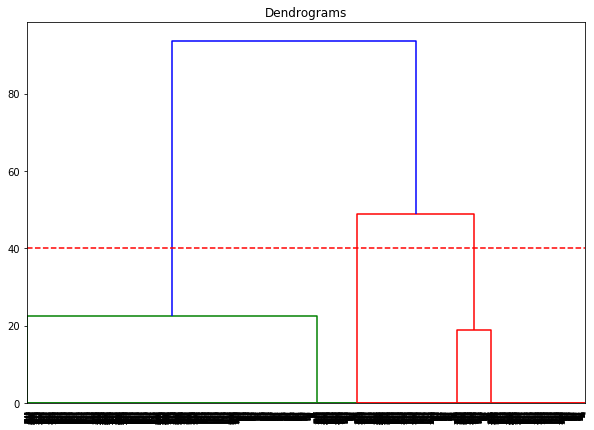

In [45]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(obs, method='ward'))
plt.axhline(y=40, color='r', linestyle='--')

In [32]:
obs=np.array(obs).reshape(-1,1)

In [33]:
obs[10]

array([1])

In [34]:
acc[10]

array([31349.29664283])

In [35]:
obs=np.array(obs).reshape(-1,1)

In [36]:
np.array(obs).shape

(3950, 1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Text(0, 0.5, 'acceleration')

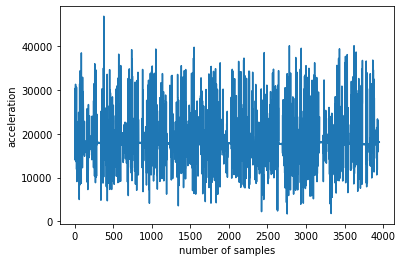

In [37]:
remodel = hmm.MultinomialHMM(n_components=4, n_iter=100)
remodel.fit(obs)
hidden_states = remodel.predict(obs)
print(hidden_states[1:1000])
from matplotlib import pyplot as plt
plt.plot(acc)
plt.xlabel('number of samples')
plt.ylabel('acceleration')

In [38]:
remodel.transmat_

array([[0.42000291, 0.38316031, 0.18081433, 0.01602246],
       [0.12558953, 0.8476071 , 0.01232012, 0.01448325],
       [0.24086507, 0.02162142, 0.72031536, 0.01719816],
       [0.02004954, 0.01001287, 0.0167206 , 0.95321699]])

In [39]:
remodel.emissionprob_

array([[2.57846496e-01, 9.94410984e-04, 2.54176524e-01, 4.23018774e-01,
        6.39637946e-02],
       [1.99969751e-01, 1.33077293e-01, 2.56345428e-01, 2.72543227e-01,
        1.38064300e-01],
       [3.24756280e-01, 1.82688782e-06, 8.35728350e-02, 5.91390931e-01,
        2.78127045e-04],
       [1.66012340e-18, 2.88639915e-60, 1.91754719e-17, 1.00000000e+00,
        2.65726842e-54]])

In [59]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array(remodel.transmat_)
                           
model.emissionprob_=np.array(remodel.emissionprob_)



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(3940)

In [60]:
Z

array([1, 3, 0, ..., 3, 3, 3])

Text(0.5, 0, 'number of samples')

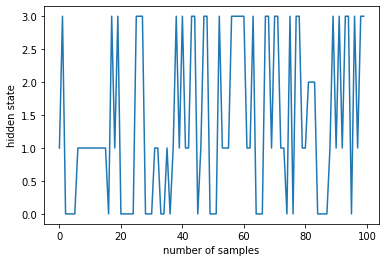

In [62]:
plt.plot(Z[0:100])
plt.ylabel('hidden state')
plt.xlabel('number of samples')

In [35]:
import math
bi=[]
for i in range(1,10):

   
    remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
    remodel.fit(obs)
    bic = -2 *remodel.score(obs) + (i**2+(5*i)-1) * math.log(len(obs))
    bi.append(bic)
print(bi)
print(min(bi))
print(bi.index(min(bi))+1)


    

[10381.623284275647, 9437.466230965045, 9511.677578418778, 9549.376285180972, 9689.586600751854, 9791.400462900034, 9931.042252189975, 10096.124589275298, 10286.484548565919]
9437.466230965045
2


In [55]:
#https://rdrr.io/cran/HMMpa/man/AIC_HMM.html
import math
bi=[]
for i in range(1,10):

   
    remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
    remodel.fit(obs)
    bic = -2 *remodel.score(obs) + (i**2+(5*i)-1) * math.log(len(obs))
    bi.append(bic)
print(bi)
print(min(bi))
print(bi.index(min(bi))+1)

[10381.623284275647, 9437.46885364099, 9512.185503649556, 9554.667674422595, 9686.591359851818, 9806.941094985914, 9926.264241245797, 10113.087735243062, 10270.33785524774]
9437.46885364099
2


In [57]:
A_SLOW1=[[],[]]

for i in range(2):
    for j in range(2):
        A_SLOW1[i].append(A_COMPOSITE[i][j])

In [58]:
A_SLOW2=[[],[]]
k=2
for i in range(2):
    
    for j in range(2,4):
        A_SLOW2[i].append(A_COMPOSITE[k][j])
    k=k+1

In [59]:
A_FAST1=[[],[]]

for i in range(2):
    for j in range(2,4):
        A_FAST1[i].append(A_COMPOSITE[i][j])

In [63]:
A_FAST2=[[],[]]
k=2
for i in range(2):
    
    for j in range(2):
        A_FAST2[i].append(A_COMPOSITE[k][j])
    k=k+1

In [64]:
A_SLOW1

[[0.8567708333333333, 0.12239583333333333],
 [0.024479166666666666, 0.9546874999999999]]

In [65]:
A_SLOW2

[[0.8704427083333333, 0.12434895833333333],
 [0.02486979166666667, 0.9699218749999999]]

In [66]:
A_FAST1

[[0.018229166666666664, 0.0026041666666666665],
 [0.0005208333333333333, 0.020312499999999997]]

In [67]:
A_FAST2

[[0.004557291666666666, 0.0006510416666666666],
 [0.00013020833333333333, 0.005078124999999999]]

In [69]:
#######################
A_SLOW=[[0.9,0.1],[0.1,0.9]]
A_FAST=[[0.1,0.9],[0.9,0.1]]

In [82]:
####
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = np.array([0.4,0.6])
model.transmat_ = np.array(A_SLOW)
                           
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X1, Z = model.sample(3940)

In [83]:
####
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = np.array([0.4,0.6])
model.transmat_ = np.array(A_FAST)
                           
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X2, Z = model.sample(3940)

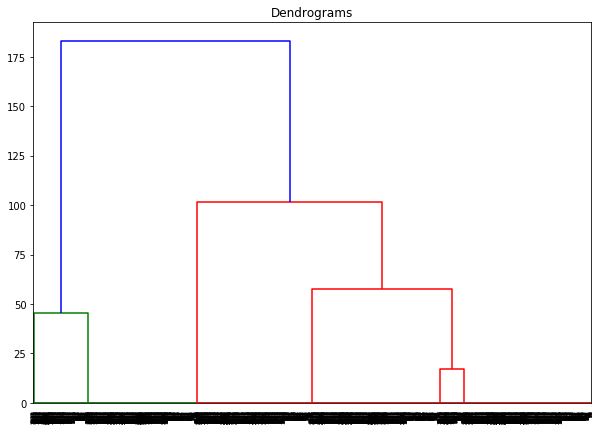

In [85]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [61]:
import math
bi=[]
for i in range(1,10):

   
    remodel = hmm.MultinomialHMM(n_components=i, n_iter=100)
    remodel.fit(obs)
    bic = -2 *remodel.score(obs) + (i**2+(5*i)-1) * math.log(len(obs))
    bi.append(remodel.score(obs))
print(bi)
print(min(bi))


[-5170.107964993085, -4664.900262197243, -4636.397147458197, -4629.762796375813, -4618.620043597798, -4630.076761621601, -4629.592044471338, -4616.832588853569, -4626.692103288221]
-5170.107964993085


In [63]:

print(bi.index(min(bi))+1)

1


In [ ]:
#######################################################################################################

In [26]:
################################

In [27]:
X.shape

(1626, 1)

In [28]:
obs.shape

(1626, 1)

In [29]:
obs

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [30]:
X

array([[4],
       [2],
       [0],
       ...,
       [1],
       [2],
       [0]], dtype=int64)

In [31]:
obs1=obs.tolist()


In [32]:
obs2=[j for i in obs1 for j in i ]

In [33]:
X1=X.tolist()

In [34]:
X2=[j for i in X1 for j in i]

In [35]:
pip install RegscorePy

Note: you may need to restart the kernel to use updated packages.


In [36]:
from RegscorePy import *

In [37]:
from RegscorePy import *

In [38]:
obs2

[1,
 0,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 3,
 0,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 2,
 1,
 1,
 4,
 0,
 2,
 2,
 0,
 3,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 4,
 1,
 2,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 4,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 3,
 0,
 4,
 4,
 2,
 3,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 3,
 2,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 3,
 0,
 2,
 1,
 0,
 0,
 0,


In [39]:
X2

[4,
 2,
 0,
 3,
 3,
 4,
 1,
 0,
 2,
 1,
 0,
 1,
 3,
 2,
 0,
 0,
 4,
 3,
 0,
 2,
 1,
 4,
 2,
 2,
 0,
 3,
 3,
 4,
 0,
 1,
 1,
 1,
 2,
 3,
 4,
 0,
 3,
 3,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 3,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 3,
 0,
 0,
 3,
 3,
 0,
 2,
 3,
 0,
 1,
 3,
 2,
 1,
 1,
 1,
 3,
 4,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 2,
 2,
 3,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 3,
 2,
 2,
 1,
 3,
 2,
 1,
 3,
 3,
 0,
 3,
 0,
 2,
 0,
 2,
 1,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 0,
 0,
 4,
 1,
 4,
 4,
 3,
 1,
 1,
 2,
 2,
 0,
 4,
 2,
 3,
 3,
 1,
 3,
 4,
 2,
 2,
 3,
 1,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 4,
 1,
 1,
 0,
 4,
 2,
 0,
 1,
 3,
 1,
 3,
 2,
 1,
 3,
 0,
 0,
 3,
 0,
 2,
 1,
 2,
 0,
 2,
 3,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 4,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 3,
 3,
 0,
 3,
 2,
 3,
 4,
 2,
 3,
 4,
 3,
 3,
 0,
 0,
 4,
 2,
 2,
 1,
 3,
 3,
 1,
 2,
 3,
 0,
 3,
 0,
 3,
 3,
 0,
 4,
 1,
 4,
 3,
 0,
 2,
 4,
 1,
 1,
 0,
 2,
 2,
 1,
 3,
 4,
 4,
 3,
 4,
 2,
 2,
 2,
 2,
 4,
 1,
 3,
 2,
 0,
 1,
 0,
 4,


In [42]:
#bic = 1626 * log(mse) + num_params * log(1626)

In [43]:
#sklearn.metrics.mean_squared_error(obs2,X2)

In [44]:
m=2

In [45]:
2 *(model.score(obs)) + (m**2+(5*m)-1)*math.log(len(obs),10)

-4751.8161069014795

In [46]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=3)
model.startprob_ = np.array([0.4, 0.4,0.2])
model.transmat_ = np.array([[0.4, 0.3,0.3],
                           [0.6, 0.2,0.2],
                           [0.3,0.3,0.4]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1],
                             [0.2,0.2,0.3,0.1,0.2]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X3, Z = model.sample(1626)



In [47]:
X3=X3.tolist()

In [48]:
X3=[j for i in X3 for j in i]

In [51]:
import sklearn

In [52]:
sklearn.metrics.mean_squared_error(obs2,X3)

2.8480934809348093

In [53]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.4, 0.3,0.1,0.2])
model.transmat_ = np.array([[0.4, 0.3,0.2,0.1],
                           [0.6, 0.2,0.1,0.1],
                           [0.3,0.3,0.1,0.3],
                           [0.3,0.4,0.2,0.1]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1],
                             [0.2,0.2,0.3,0.1,0.2],
                             [0.2,0.3,0.2,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X4, Z = model.sample(1626)

In [54]:
X4=X4.tolist()


In [55]:
X4=[j for i in X4 for j in i]

In [56]:
sklearn.metrics.mean_squared_error(obs2,X4)

2.791512915129151

In [60]:
import math 
from math import log

In [62]:
#bic = 1626 * log(mse) + num_params * log(1626)

In [99]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=1)
model.startprob_ = np.array([1])
model.transmat_ = np.array([[1]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X1, Z = model.sample(1626)

In [100]:
X1=X1.tolist()
X1=[j for i in X1 for j in i]

In [101]:
sklearn.metrics.mean_squared_error(obs2,X1)

2.7072570725707257

In [67]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=5)
model.startprob_ = np.array([0.4, 0.2,0.1,0.2,0.1])
model.transmat_ = np.array([[0.2,0.2, 0.3,0.2,0.1],
                           [0.2,0.4, 0.2,0.1,0.1],
                           [0.1,0.2,0.3,0.1,0.3],
                           [0.3,0.2,0.2,0.2,0.1],
                           [0.3,0.1,0.2,0.1,0.3]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1],
                             [0.2,0.2,0.3,0.1,0.2],
                             [0.2,0.3,0.2,0.2,0.1],
                             [0.2,0.2,0.3,0.1,0.2]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X5, Z = model.sample(1626)

In [68]:
X5=X5.tolist()
X5=[j for i in X5 for j in i]

In [69]:
sklearn.metrics.mean_squared_error(obs2,X5)

2.9022140221402215

Text(0, 0.5, 'mse')

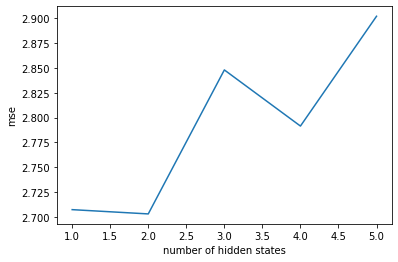

In [70]:
mse=[2.7072570725707257,2.7029520295202953,2.8480934809348093,2.791512915129151,2.9022140221402215]
n=[1,2,3,4,5]
plt.plot(n,mse)
plt.xlabel('number of hidden states')
plt.ylabel('mse')

In [71]:
########################BIC############################3

In [74]:
#bic = -2 *model.score + (m**2+(5*m)-1) * log(1626)

In [75]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = np.array([0.4, 0.6])
model.transmat_ = np.array([[0.4, 0.6],
                           [0.6, 0.4]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X2, Z = model.sample(1626)

In [76]:
obs2=np.array(obs2).reshape(-1,1)

In [77]:
model.score(obs2)

-2396.7803369689173

In [78]:
m=2

In [79]:
bic = 2 *model.score(obs2) + (m**2+(5*m)-1) * log(1626)

In [80]:
bic

-4697.440256166434

In [81]:
########
m=3

In [82]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=3)
model.startprob_ = np.array([0.4, 0.4,0.2])
model.transmat_ = np.array([[0.4, 0.3,0.3],
                           [0.6, 0.2,0.2],
                           [0.3,0.3,0.4]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1],
                             [0.2,0.2,0.3,0.1,0.2]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X3, Z = model.sample(1626)


In [83]:
bic = 2 *model.score(obs2) + (m**2+(5*m)-1) * log(1626)

In [84]:
bic

-4670.262473152136

In [85]:
m=4

In [86]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.4, 0.3,0.1,0.2])
model.transmat_ = np.array([[0.4, 0.3,0.2,0.1],
                           [0.6, 0.2,0.1,0.1],
                           [0.3,0.3,0.1,0.3],
                           [0.3,0.4,0.2,0.1]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1],
                             [0.2,0.2,0.3,0.1,0.2],
                             [0.2,0.3,0.2,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X4, Z = model.sample(1626)

In [87]:
bic = 2 *model.score(obs2) + (m**2+(5*m)-1) * log(1626)
bic

-4525.857259615956

In [88]:
m=5

In [89]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=5)
model.startprob_ = np.array([0.4, 0.2,0.1,0.2,0.1])
model.transmat_ = np.array([[0.2,0.2, 0.3,0.2,0.1],
                           [0.2,0.4, 0.2,0.1,0.1],
                           [0.1,0.2,0.3,0.1,0.3],
                           [0.3,0.2,0.2,0.2,0.1],
                           [0.3,0.1,0.2,0.1,0.3]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1],
                             [0.2,0.2,0.3,0.1,0.2],
                             [0.2,0.3,0.2,0.2,0.1],
                             [0.2,0.2,0.3,0.1,0.2]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X5, Z = model.sample(1626)

In [90]:
bic = 2 *model.score(obs2) + (m**2+(5*m)-1) * log(1626)
bic

-4519.773431731372

In [91]:
m=1

In [92]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=1)
model.startprob_ = np.array([1])
model.transmat_ = np.array([[1]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X1, Z = model.sample(1626)

In [93]:
bic = 2 *model.score(obs2) + (m**2+(5*m)-1) * log(1626)
bic

-4631.383290546097

Text(0, 0.5, 'bic')

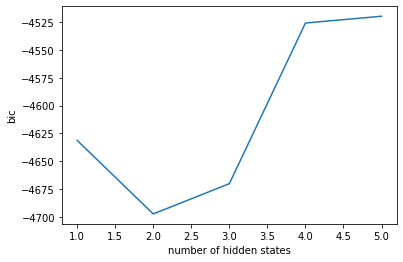

In [94]:
bic=[-4631.383290546097,-4697.440256166434,-4670.262473152136,-4525.857259615956,-4519.773431731372]
n=[1,2,3,4,5]
plt.plot(n,bic)
plt.xlabel('number of hidden states')
plt.ylabel('bic')

In [95]:
############################################

In [331]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = np.array([0.7, 0.3])
model.transmat_ = np.array([[0.3, 0.7],
                           [0.4, 0.6]])
model.emissionprob_=np.array([[0.2,0.1,0.2,0.3,0.2],
                                [0.3,0.2,0.4,0.1,0]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X2, Z = model.sample(1626)

In [332]:
bic = 2 *model.score(obs2) + (m**2+(5*m)-1) * log(1626)
bic

-5171.3570267667155

In [339]:
import numpy as np
from hmmlearn import hmm
np.random.seed(4)

model = hmm.MultinomialHMM(n_components=3)
model.startprob_ = np.array([0.4, 0.6,0])
model.transmat_ = np.array([[0.2, 0.4,0.4],
                           [0.4, 0.4,0.2],
                           [0.3,0.3,0.4]])
model.emissionprob_=np.array([[0.2,0.2,0.1,0.2,0.3],
                                [0.2,0.2,0.3,0.2,0.1],
                             [0.2,0.2,0.3,0.1,0.2]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X3, Z = model.sample(1626)


In [340]:
bic = 2 *model.score(obs2) + (m**2+(5*m)-1) * log(1626)
bic

-5128.4716692635375

In [152]:
bic.bic(obs2,X2,4)

1646.379702699165

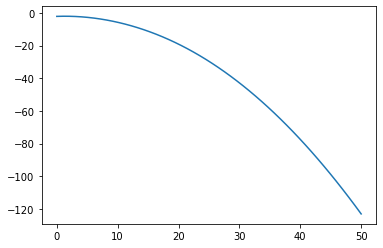

In [78]:
%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot

a = np.array(obs).reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(a)
s = linspace(0,50)
e = kde.score_samples(s.reshape(-1,1))
plot(s, e)

In [79]:
from scipy.signal import argrelextrema
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print ("Minima:", s[mi])
print( "Maxima:", s[ma])

Minima: []
Maxima: [1.02040816]


In [155]:
import sklearn
mse=sklearn.metrics.mean_squared_error(obs2,X2)

2.7029520295202953

In [164]:
import math
from math import log

In [169]:
bic = 1626 * (log(2.70))+ 1 * log(1626)

In [170]:
bic

1622.4212612048286

In [80]:
len(acc)

1626

In [81]:
acc

array([[19678.75971701],
       [15181.52192634],
       [18105.29823008],
       ...,
       [19702.41000487],
       [19747.44418906],
       [19596.5519416 ]])

In [82]:
len(acc)

1626

In [212]:
model.score(obs)

-2396.7803369689173

In [63]:
model.score(obs)


-2396.7803369689173

In [213]:
math.log(len(obs),10)

3.211120541258049

In [64]:
model._compute_log_likelihood(obs)

array([[-1.2039728 , -1.60943791],
       [-1.60943791, -1.60943791],
       [-1.2039728 , -1.60943791],
       ...,
       [-1.2039728 , -1.60943791],
       [-1.2039728 , -1.60943791],
       [-1.2039728 , -1.60943791]])

In [66]:
for n in range(1,15):
    bic= 2 *(model.score(obs)) + math.log(len(obs),10)*math.log(len(obs),10)
    print("n",n,"bic",bic)

n 1 bic 4806.405156102866
n 2 bic 4828.882999891673
n 3 bic 4857.783084762996
n 4 bic 4893.105410716834
n 5 bic 4934.849977753189
n 6 bic 4983.01678587206
n 7 bic 5037.6058350734465
n 8 bic 5098.617125357349
n 9 bic 5166.050656723768
n 10 bic 5239.906429172704
n 11 bic 5320.184442704154
n 12 bic 5406.884697318122
n 13 bic 5500.007193014605
n 14 bic 5599.551929793604


In [173]:
# path settings
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pickle


from src.GaussianHMM import GaussianHMM
from src.DiscreteHMM import MultinomialHMM
from src.HeterogeneousHMM import HeterogeneousHMM
import src.utils as su
import src.model_order_selection_utils as mos

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'src'

In [ ]:
########################################

In [14]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array([[0.73437,0.24481,0.01562,0.0052],
                            
                            [0.0489,0.9304,0.0010,0.0197],
                            [0.0039,0.0013,0.74611,0.24869],
                            [0.0002,0.0049,0.049,0.9459]])
                           
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1],
                             [0.2,0.3,0.2,0.2,0.1],
                             [0.2,0.2,0.3,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(1000)

In [15]:
X = X.tolist()
X=sum(X, [])
import random
Y=[]

for i in range(len(X)):
    if X[i]==0:
        Y.append(2)
    elif X[i]==1:
        Y.append(2.5)
    elif X[i]==2:
        Y.append(3)
    elif X[i]==3:
        Y.append(3.5)
    elif X[i]==4:
        Y.append(4)
    
print(Y)

[4, 3, 2, 3.5, 3.5, 4, 2.5, 2, 3, 2.5, 2, 2.5, 3.5, 3, 2, 2, 4, 3.5, 2, 3, 3, 4, 3, 3, 2, 3.5, 3.5, 4, 2, 2.5, 2.5, 2.5, 3, 3.5, 4, 2, 3.5, 3.5, 2, 2, 3, 2, 2.5, 3, 3, 3.5, 3, 3, 3, 2, 3, 3, 2.5, 3.5, 2, 2, 3.5, 3.5, 2, 3, 3.5, 2, 3, 3.5, 3, 2.5, 2.5, 2.5, 3.5, 4, 2.5, 2.5, 2, 3, 2.5, 2.5, 3, 2.5, 3.5, 3.5, 3, 3, 3.5, 2, 3, 2, 2.5, 2, 2.5, 2, 2, 3.5, 3, 3, 2.5, 3.5, 3, 2.5, 3.5, 3.5, 2, 3.5, 2, 3, 2, 3, 2.5, 2.5, 3.5, 3.5, 3, 2.5, 2.5, 2.5, 3, 3, 3, 3.5, 2, 2, 4, 2.5, 4, 4, 3.5, 2.5, 2.5, 3, 3, 2, 4, 3, 3.5, 3.5, 2.5, 3.5, 4, 3, 3, 3.5, 2.5, 2, 2, 3, 3, 2, 2.5, 3, 2.5, 2, 3, 3, 4, 2.5, 2.5, 2, 4, 3, 2, 2.5, 3.5, 2.5, 3.5, 3, 2.5, 3.5, 2, 2, 3.5, 2, 3, 3, 3, 2, 3, 3.5, 2, 3, 3, 3, 3, 3, 2.5, 4, 2, 2, 3, 2.5, 2, 2.5, 3, 3.5, 3.5, 2, 3.5, 3, 3.5, 4, 3, 3.5, 4, 3.5, 3.5, 2, 2, 4, 3, 3, 2.5, 3.5, 3.5, 3, 3, 3.5, 2, 3.5, 2, 3.5, 3.5, 2, 4, 2.5, 4, 3.5, 2, 3, 4, 3, 2.5, 2, 3, 3, 2.5, 3.5, 4, 4, 3.5, 4, 3, 3, 3, 3, 4, 2.5, 3.5, 3, 2, 2.5, 2, 4, 3, 3.5, 2, 3.5, 3.5, 3, 3.5, 2, 3.5, 2, 2.5, 3.5,

In [ ]:
###################

In [19]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array([[0.85677,0.12241,0.01822,0.00260],
                            
                            [0.02447,0.954698,0.00052,0.020312],
                            [0.00455,0.000651,0.87044,0.124359],
                            [0.0001302,0.00507,0.02486,0.9699398]])
                           
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1],
                             [0.2,0.3,0.2,0.2,0.1],
                             [0.2,0.2,0.3,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(500)

In [20]:
X = X.tolist()
X=sum(X, [])
import random
Y=[]

for i in range(len(X)):
    if X[i]==0:
        Y.append(2)
    elif X[i]==1:
        Y.append(2.5)
    elif X[i]==2:
        Y.append(3)
    elif X[i]==3:
        Y.append(3.5)
    elif X[i]==4:
        Y.append(4)
    
print(Y)

[4, 3, 2, 3.5, 3.5, 4, 2.5, 2, 3, 2.5, 2, 2.5, 3.5, 3, 2, 2, 4, 3.5, 2, 3, 3, 4, 3, 3, 2, 3.5, 3.5, 4, 2, 2.5, 2.5, 2.5, 3, 3.5, 4, 2, 3.5, 3.5, 2, 2, 3, 2, 2.5, 3, 3, 3.5, 3, 3, 3, 2, 3, 3, 2.5, 3.5, 2, 2, 3.5, 3.5, 2, 3, 3.5, 2, 3, 3.5, 3, 2.5, 2.5, 2.5, 3.5, 4, 2.5, 2.5, 2, 3, 2.5, 2.5, 3, 2.5, 3.5, 3.5, 3, 3, 3.5, 2, 3, 2, 2.5, 2, 2.5, 2, 2, 3.5, 3, 3, 2.5, 3.5, 3, 2.5, 3.5, 3.5, 2, 3.5, 2, 3, 2, 3, 2.5, 2.5, 3.5, 3.5, 3, 2.5, 2.5, 2.5, 3, 3, 3, 3.5, 2, 2, 4, 2.5, 4, 4, 3.5, 2.5, 2.5, 3, 3, 2, 4, 3, 3.5, 3.5, 2.5, 3.5, 4, 3, 3, 3.5, 2.5, 2, 2, 3, 3, 2, 2.5, 3, 2.5, 2, 3, 3, 4, 2.5, 2.5, 2, 4, 3, 2, 2.5, 3.5, 2.5, 3.5, 3, 2.5, 3.5, 2, 2, 3.5, 2, 2.5, 2.5, 3, 2, 3, 3.5, 2, 3, 3, 3, 3, 3, 2.5, 4, 2, 2, 3, 2.5, 2, 2.5, 3, 3.5, 3.5, 2, 3.5, 3, 3.5, 4, 3, 3.5, 4, 3.5, 3.5, 2, 2, 4, 3, 3, 2.5, 3.5, 3.5, 3, 3, 3.5, 2, 3.5, 2, 3.5, 3.5, 2, 4, 2.5, 4, 3.5, 2, 3, 4, 3, 2.5, 2, 3, 3, 2.5, 3.5, 4, 4, 3.5, 4, 3, 3, 3, 3, 4, 2.5, 3.5, 3, 2, 2.5, 2, 4, 3, 3.5, 2, 3.5, 3.5, 3, 3.5, 2, 3.5, 2, 2.5, 

In [ ]:
################################3333333

In [1]:
A_F=[[7/8,1/8],[1/40,39/40]]
A_S=[[47/48,1/48],[1/192,191/192]]

In [2]:
A_COMPOSITE=[[] for i in range(len(A_F)+len(A_S))]

In [3]:
A_COMPOSITE

[[], [], [], []]

In [4]:



A_F=[[15/16,1/16],[1/80,79/80]]
A_S=[[95/96,1/96],[1/192,191/192]]


A_COMPOSITE=[[] for i in range(len(A_F)+len(A_S))]
s=0
v=0
for i in range(len(A_S)):
    for j in range(len(A_F)):
        for k in range(len(A_F)):
            for m in range(len(A_S)):
                if s==4:
                    v=v+1
                    s=1
                    A_COMPOSITE[v].append(A_S[i][k]*A_F[j][m])
                else:
                    
                    A_COMPOSITE[v].append(A_S[i][k]*A_F[j][m])
                    s=s+1
        



    

        

In [5]:
A_COMPOSITE

[[0.927734375, 0.061848958333333336, 0.009765625, 0.0006510416666666666],
 [0.012369791666666668,
  0.9772135416666667,
  0.00013020833333333333,
  0.010286458333333333],
 [0.0048828125, 0.0003255208333333333, 0.9326171875, 0.062174479166666664],
 [6.510416666666667e-05,
  0.005143229166666667,
  0.012434895833333334,
  0.9823567708333334]]

In [15]:
A_C=[[] for i in range(4)]

In [16]:
from fractions import Fraction
k=0
for i in A_COMPOSITE:
    
    for j in i:
        A_C[k].append(Fraction(j))
    k=k+1
        

In [17]:
A_C

[[Fraction(475, 512),
  Fraction(8913374262504107, 144115188075855872),
  Fraction(5, 512),
  Fraction(6004799503160661, 9223372036854775808)],
 [Fraction(3565349705001643, 288230376151711744),
  Fraction(4400978542111403, 4503599627370496),
  Fraction(4803839602528529, 36893488147419103232),
  Fraction(5929739509371153, 576460752303423488)],
 [Fraction(5, 1024),
  Fraction(6004799503160661, 18446744073709551616),
  Fraction(955, 1024),
  Fraction(8960286758622549, 144115188075855872)],
 [Fraction(4803839602528529, 73786976294838206464),
  Fraction(5929739509371153, 1152921504606846976),
  Fraction(896028675862255, 72057594037927936),
  Fraction(1106035396767471, 1125899906842624)]]

In [ ]:
B_1=[[0.125,0.375,0.25,0.125,0.125],[0.4,0.25,0.15,0.1,0.1]]

In [ ]:
B_2=[[0.0833,0.1666,0.25,0.291,0.2083],[0.3125,0.2083,0.2083,0.1666,0.1041]]

In [ ]:
B_C=[[] for i in range(len(B_1)*len(B_2))]


B_C

In [ ]:
for i in range(len(B_C)):
    
      

In [ ]:
def decimalToBinary(n):
    return bin(n).replace("0b", "")

decimalToBinary(1)

In [ ]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=4)
model.startprob_ = np.array([0.2,0.3,0.3,0.2])
model.transmat_ = np.array([[0.9,0.1,0,0],
                           [0.1,0.9,0,0],
                           [0,0,0.4,0.6],
                           [0,0,0.6,0.4]])
                           
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1],
                             [0.2,0.3,0.2,0.2,0.1],
                             [0.2,0.2,0.3,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(10000)
>>> import numpy as np
>>> from sklearn.model_selection import ShuffleSplit

>>> rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
>>> rs.get_n_splits(X)
5
>>> print(rs)
ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)
>>> for train_index, test_index in rs.split(X):



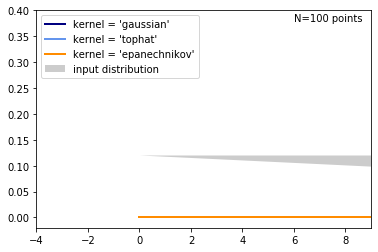

In [116]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
N = 100
np.random.seed(1)
X=acc
X_plot = np.linspace(0, 50000, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

In [41]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = np.array([0.5,0.5])
model.transmat_ = np.array([[0.9,0.1],
                           [0.1,0.9]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X1, Z = model.sample(100)

In [42]:
import numpy as np
from hmmlearn import hmm
np.random.seed(100)

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = np.array([0.5,0.5])
model.transmat_ = np.array([[0.9,0.1],
                           [0.1,0.9]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X2, Z = model.sample(100)

In [43]:
import numpy as np
from hmmlearn import hmm
np.random.seed(20)

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = np.array([0.5,0.5])
model.transmat_ = np.array([[0.1,0.9],
                           [0.9,0.1]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X3, Z = model.sample(100)

In [44]:
import numpy as np
from hmmlearn import hmm
np.random.seed(60)

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = np.array([0.4, 0.6])
model.transmat_ = np.array([[0.1,0.9],
                           [0.9,0.1]])
model.emissionprob_=np.array([[0.2,0.3,0.2,0.2,0.1],
                                [0.2,0.2,0.3,0.2,0.1]])



#model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
#model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X4, Z = model.sample(100)

In [45]:
X=[X1,X2,X3,X4]

In [8]:
X=np.array(X).reshape(-1,1)

In [9]:
from matplotlib import pyplot as plt

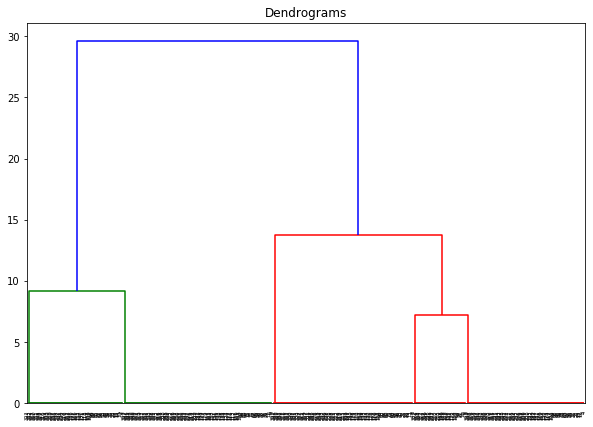

In [10]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [18]:
plt.savefig('dend', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

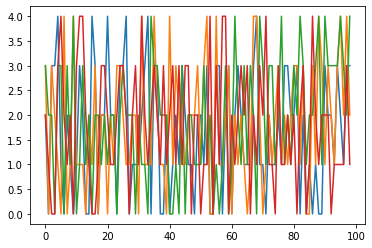

In [10]:
plt.plot(X1[1:100])
plt.plot(X2[1:100])
plt.plot(X3[1:100])
plt.plot(X4[1:100])

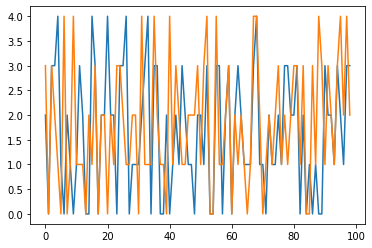

In [10]:
plt.plot(X1[1:100])
plt.plot(X2[1:100])

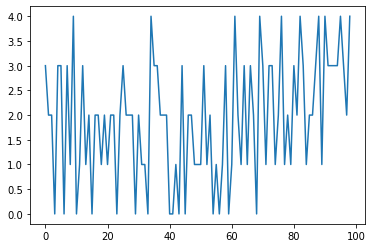

In [11]:
plt.plot(X3[1:1000])

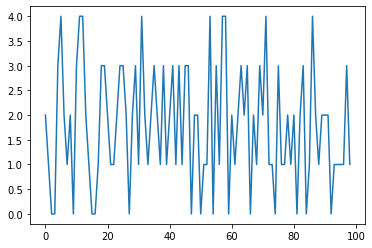

In [46]:
plt.plot(X4[1:1000])

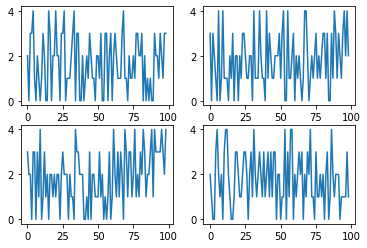

In [47]:
#plot1 = plt.figure(1)
plt.subplot(2, 2, 1)
#plt.figure(figsize=(3, 2))
plt.plot(X1[1:100])

plt.subplot(2, 2, 2)
#plt.figure(figsize=(3, 2))
plt.plot(X2[1:100])

plt.subplot(2, 2, 3)
#plt.figure(figsize=(3, 2))
plt.plot(X3[1:100])
plt.subplot(2, 2, 4)
#plt.figure(figsize=(3, 2))
plt.plot(X4[1:100])

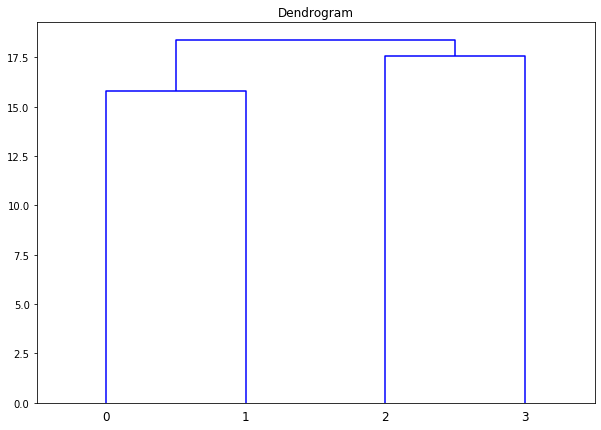

In [67]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=50, color='r', linestyle='--')

In [64]:
X=np.array(X).reshape(4,100)

In [65]:
X

array([[4, 2, 0, 3, 3, 4, 1, 0, 2, 1, 0, 1, 3, 2, 0, 0, 4, 3, 0, 2, 2, 4,
        2, 2, 0, 3, 3, 4, 0, 1, 1, 1, 2, 3, 4, 0, 3, 3, 0, 0, 2, 0, 1, 2,
        1, 3, 2, 1, 1, 0, 2, 2, 1, 3, 0, 0, 3, 3, 0, 2, 3, 0, 2, 3, 2, 1,
        1, 1, 3, 4, 1, 1, 0, 2, 1, 1, 2, 1, 3, 3, 2, 2, 3, 0, 2, 0, 1, 0,
        1, 0, 0, 3, 2, 2, 1, 3, 2, 1, 3, 3],
       [1, 3, 0, 3, 2, 1, 0, 4, 0, 1, 4, 1, 1, 1, 0, 2, 1, 3, 0, 2, 2, 0,
        2, 1, 3, 3, 2, 1, 1, 2, 2, 0, 4, 1, 1, 1, 4, 2, 1, 1, 0, 4, 1, 3,
        2, 1, 1, 2, 2, 2, 3, 1, 3, 4, 0, 0, 4, 1, 1, 2, 3, 0, 2, 1, 2, 1,
        0, 1, 4, 4, 2, 0, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 3, 1, 3, 0, 0, 3,
        1, 4, 3, 1, 3, 2, 1, 3, 4, 2, 4, 2],
       [3, 3, 2, 2, 0, 3, 3, 0, 3, 1, 4, 0, 1, 3, 1, 2, 0, 2, 2, 1, 2, 1,
        2, 2, 0, 2, 3, 2, 2, 2, 0, 2, 1, 1, 0, 4, 3, 3, 2, 2, 2, 0, 0, 1,
        0, 3, 0, 2, 2, 1, 1, 1, 3, 1, 2, 0, 1, 0, 1, 3, 0, 1, 4, 2, 1, 3,
        1, 3, 2, 0, 4, 3, 1, 3, 3, 1, 2, 4, 1, 2, 1, 3, 2, 4, 3, 1, 2, 2,
        3, 4, 1, 4, 3,

In [26]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

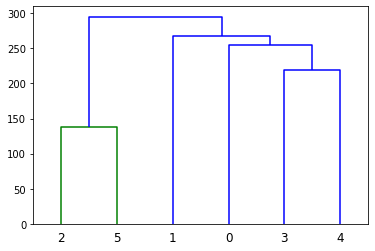

In [27]:
ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 268.,
                   400., 754., 564., 138., 219., 869., 669.])
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

In [28]:
ytdist.shape

(15,)

ModuleNotFoundError: No module named 'src'

NameError: name 'MultinomialHMM' is not defined

In [64]:
X=[[0.5,0.5],[0.5,0.5]]

In [97]:
np.power(A_COMPOSITE,3)

array([[6.28917994e-01, 1.83358016e-03, 6.05759797e-06, 1.76606355e-08],
       [1.46686413e-05, 8.70129131e-01, 1.41285084e-10, 8.38088989e-06],
       [9.46499683e-08, 2.75947430e-10, 6.59508769e-01, 1.92276609e-03],
       [2.20757944e-12, 1.30951405e-07, 1.53821287e-05, 9.12452494e-01]])

In [65]:
# Program to multiply two matrices (vectorized implementation)

# Program to multiply two matrices (vectorized implementation)
import numpy as np
# take a 3x3 matrix
X = [0.3,0.3,0.2,0.2]



# result will be 3x4

result= [[0,0,0,0]]

result = np.dot(X,A_COMPOSITE)

for r in result:
	print(r)


1.9535618912643826e-123
6.67684424816854e-38
4.24794266784089e-111
1.4518532376759075e-25
